Analyzing Depth and Width

Width Variation 1: [784, 128, 10]
Epoch 1/10, Train Loss: 0.2535, Val Loss: 0.1416
Epoch 2/10, Train Loss: 0.1077, Val Loss: 0.1188
Epoch 3/10, Train Loss: 0.0733, Val Loss: 0.1074
Epoch 4/10, Train Loss: 0.0521, Val Loss: 0.1087
Epoch 5/10, Train Loss: 0.0389, Val Loss: 0.1126
Epoch 6/10, Train Loss: 0.0300, Val Loss: 0.1143
Epoch 7/10, Train Loss: 0.0218, Val Loss: 0.1087
Epoch 8/10, Train Loss: 0.0164, Val Loss: 0.1089
Epoch 9/10, Train Loss: 0.0126, Val Loss: 0.1087
Epoch 10/10, Train Loss: 0.0098, Val Loss: 0.1092
Accuracy: 0.9737857142857143


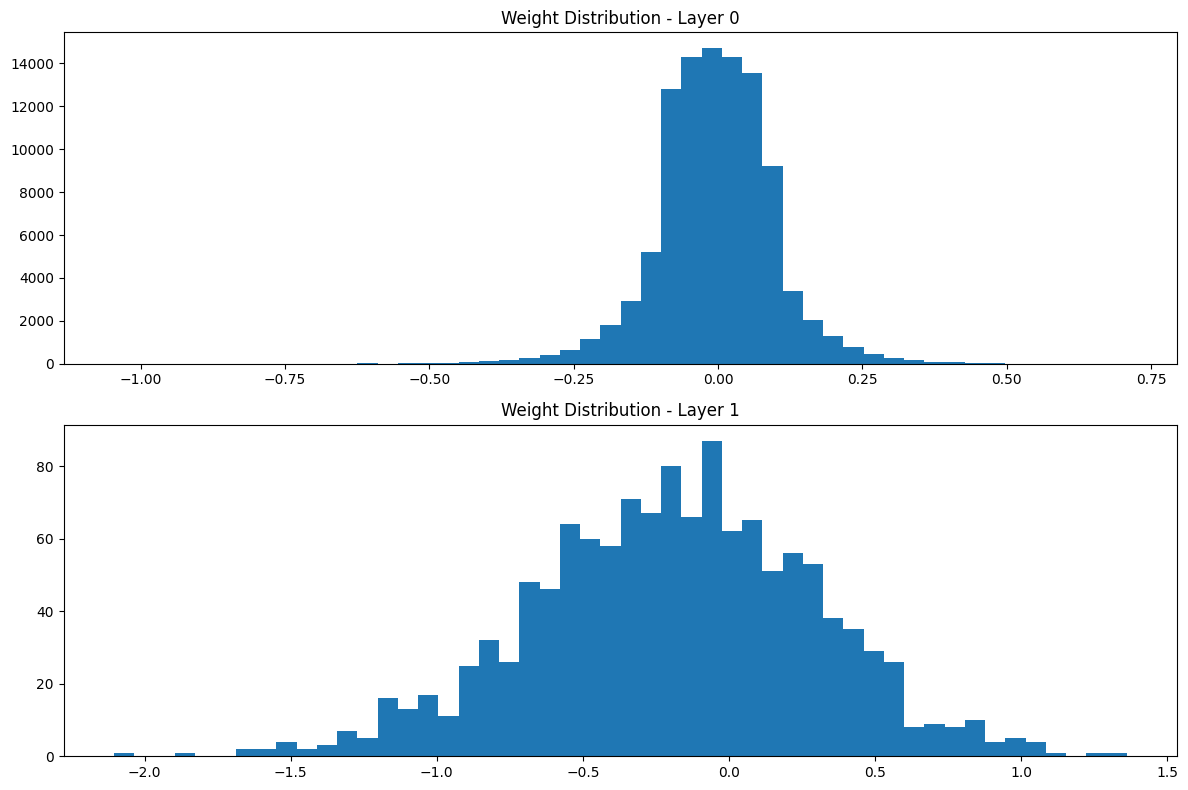

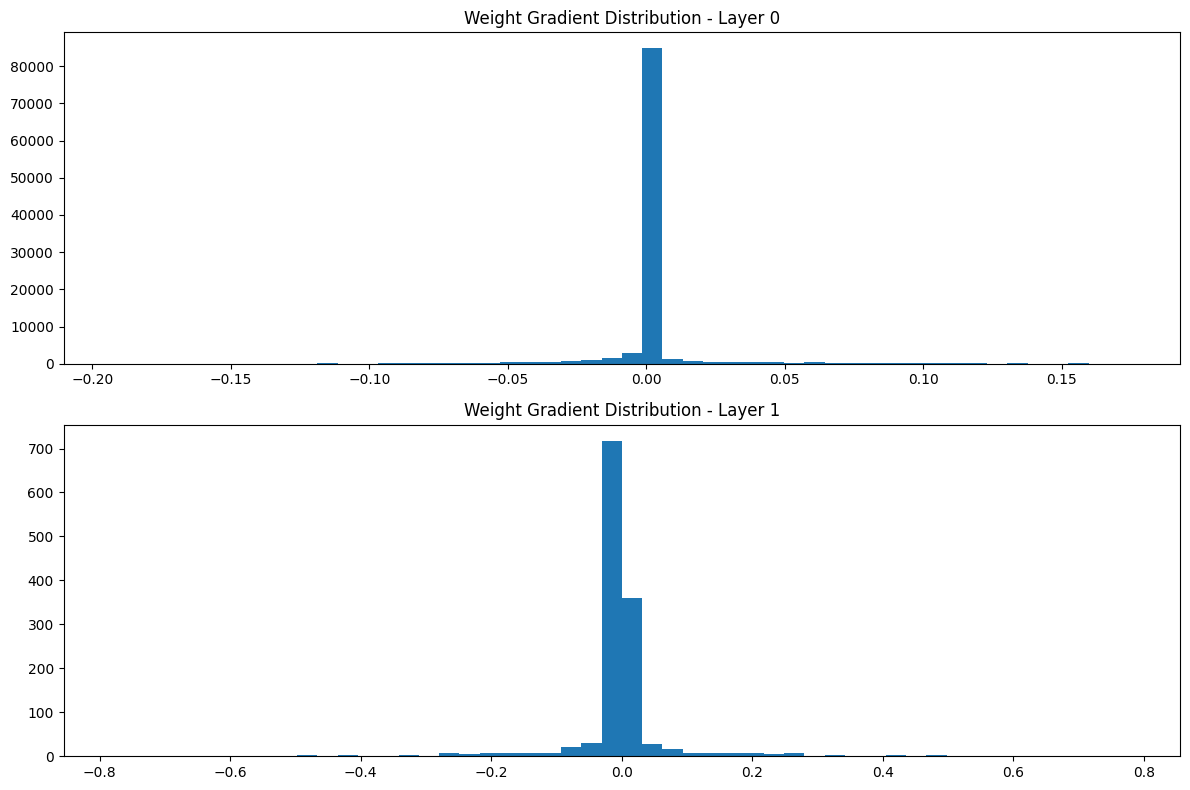


Width Variation 2: [784, 256, 10]
Epoch 1/10, Train Loss: 0.2343, Val Loss: 0.1327
Epoch 2/10, Train Loss: 0.0943, Val Loss: 0.1038
Epoch 3/10, Train Loss: 0.0598, Val Loss: 0.0953
Epoch 4/10, Train Loss: 0.0403, Val Loss: 0.0955
Epoch 5/10, Train Loss: 0.0271, Val Loss: 0.0955
Epoch 6/10, Train Loss: 0.0186, Val Loss: 0.0911
Epoch 7/10, Train Loss: 0.0135, Val Loss: 0.0978
Epoch 8/10, Train Loss: 0.0088, Val Loss: 0.0923
Epoch 9/10, Train Loss: 0.0060, Val Loss: 0.0954
Epoch 10/10, Train Loss: 0.0041, Val Loss: 0.0938
Accuracy: 0.9769285714285715


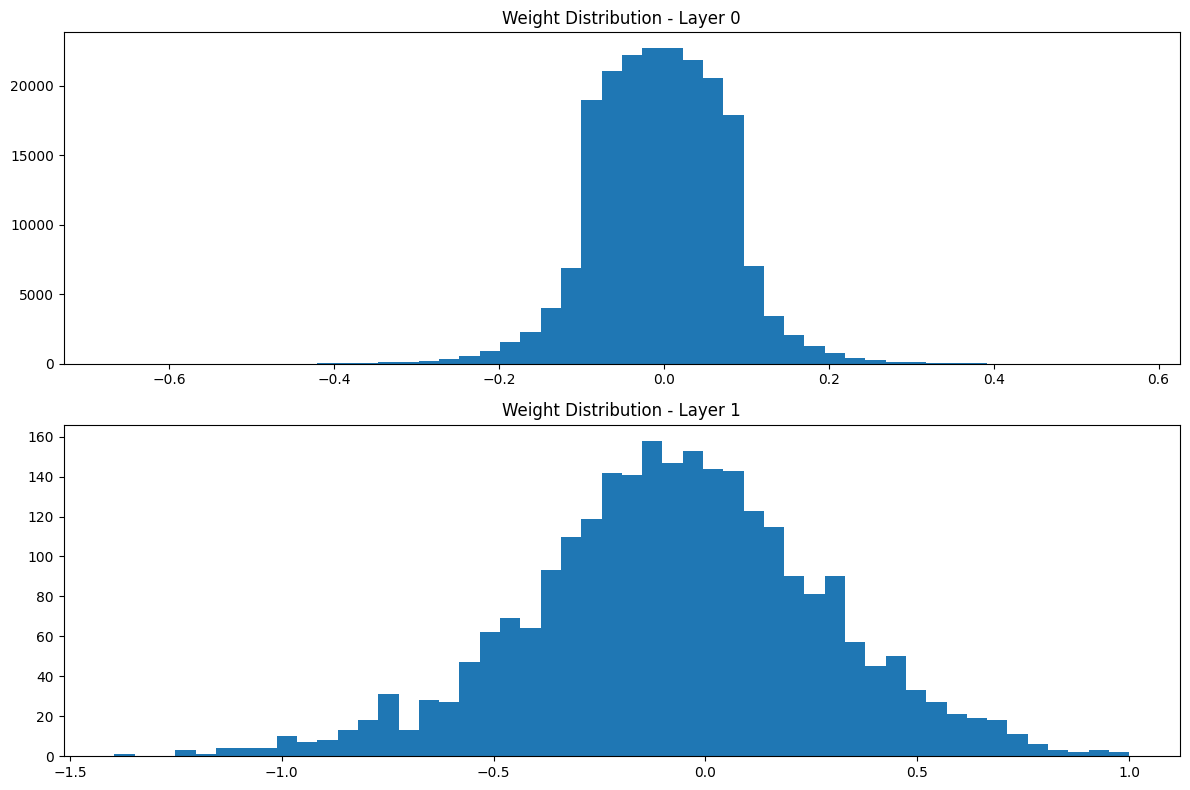

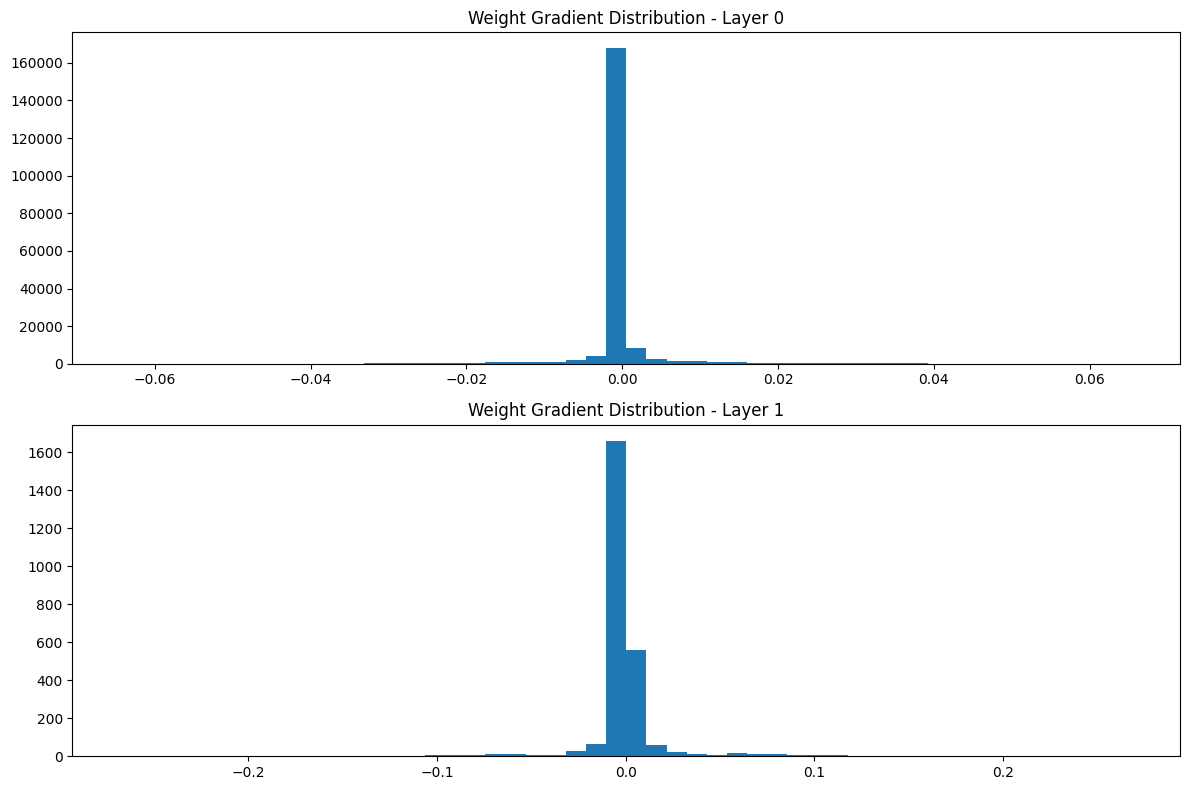


Width Variation 3: [784, 512, 10]
Epoch 1/10, Train Loss: 0.2196, Val Loss: 0.1243
Epoch 2/10, Train Loss: 0.0835, Val Loss: 0.0975
Epoch 3/10, Train Loss: 0.0513, Val Loss: 0.0911
Epoch 4/10, Train Loss: 0.0324, Val Loss: 0.0842
Epoch 5/10, Train Loss: 0.0202, Val Loss: 0.0793
Epoch 6/10, Train Loss: 0.0126, Val Loss: 0.0773
Epoch 7/10, Train Loss: 0.0080, Val Loss: 0.0760
Epoch 8/10, Train Loss: 0.0055, Val Loss: 0.0772
Epoch 9/10, Train Loss: 0.0037, Val Loss: 0.0777
Epoch 10/10, Train Loss: 0.0027, Val Loss: 0.0769
Accuracy: 0.9803571428571428


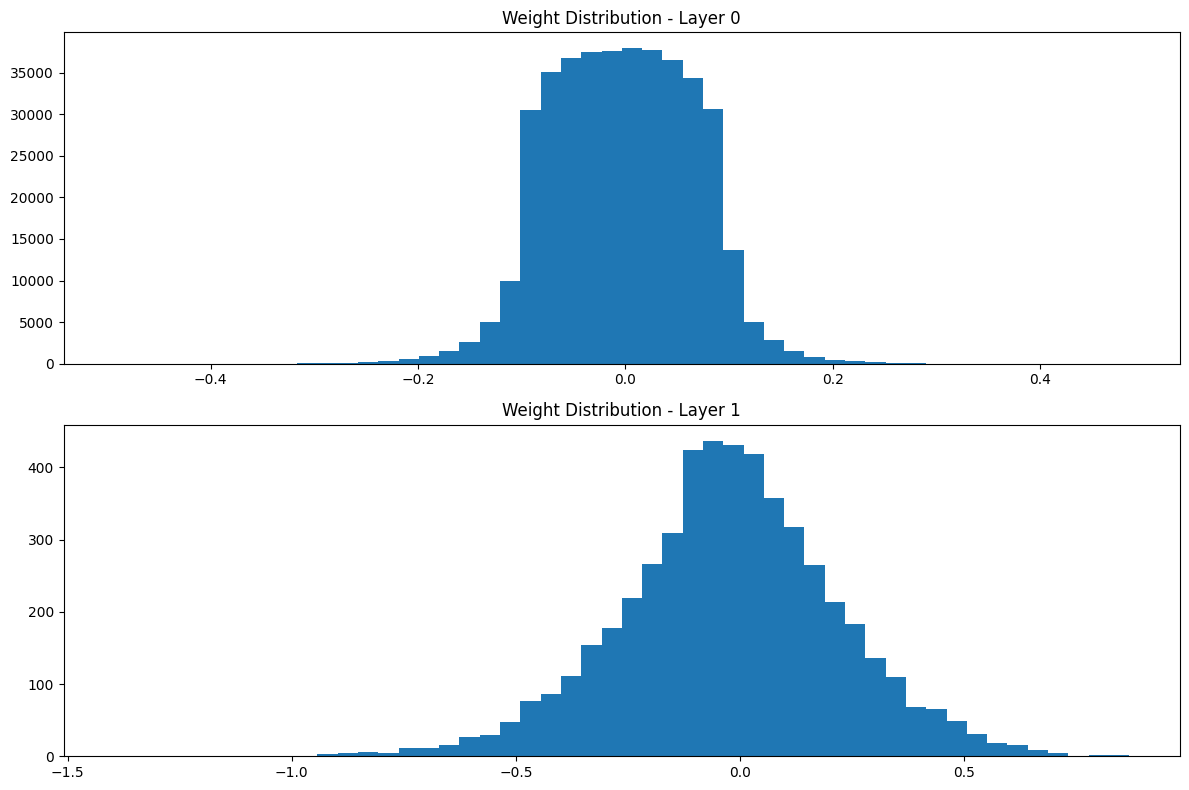

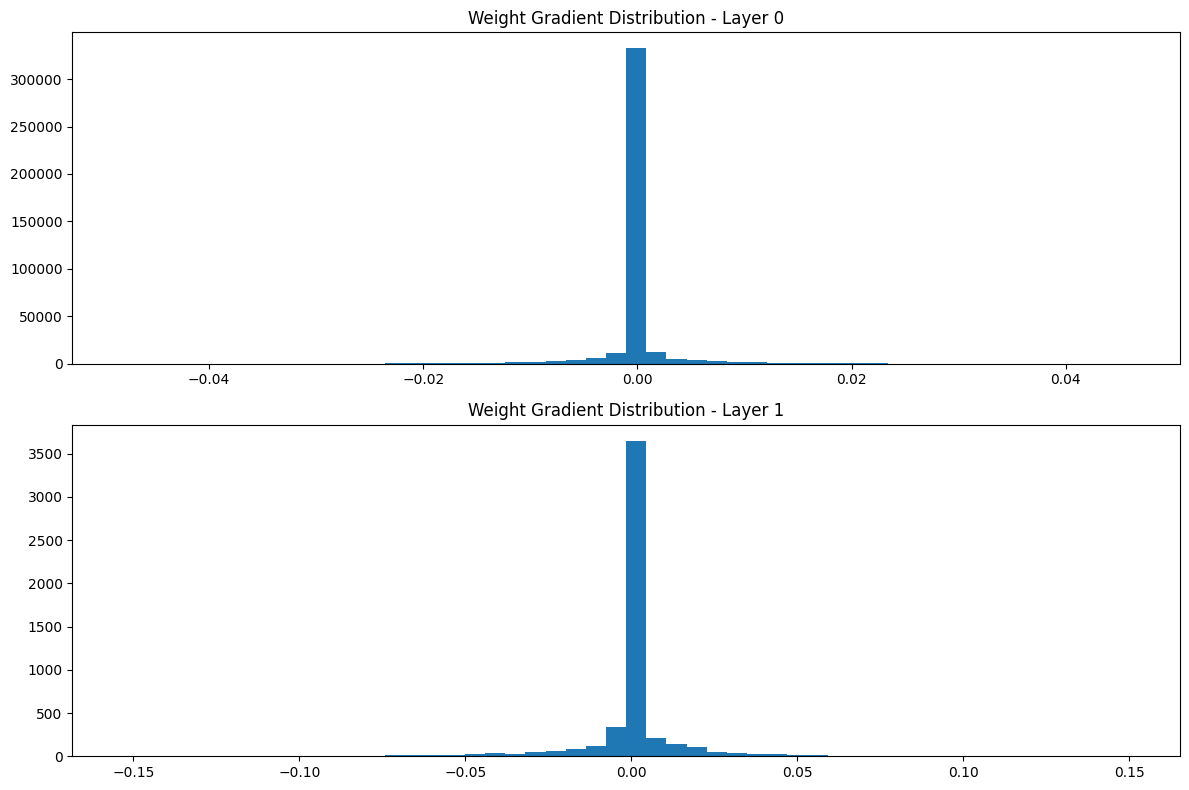


Depth Variation 1: [784, 128, 10]
Epoch 1/10, Train Loss: 0.2582, Val Loss: 0.1404
Epoch 2/10, Train Loss: 0.1076, Val Loss: 0.1125
Epoch 3/10, Train Loss: 0.0724, Val Loss: 0.1017
Epoch 4/10, Train Loss: 0.0525, Val Loss: 0.1006
Epoch 5/10, Train Loss: 0.0391, Val Loss: 0.1010
Epoch 6/10, Train Loss: 0.0294, Val Loss: 0.1038
Epoch 7/10, Train Loss: 0.0225, Val Loss: 0.0996
Epoch 8/10, Train Loss: 0.0167, Val Loss: 0.1008
Epoch 9/10, Train Loss: 0.0128, Val Loss: 0.1028
Epoch 10/10, Train Loss: 0.0097, Val Loss: 0.1002
Accuracy: 0.9754285714285714


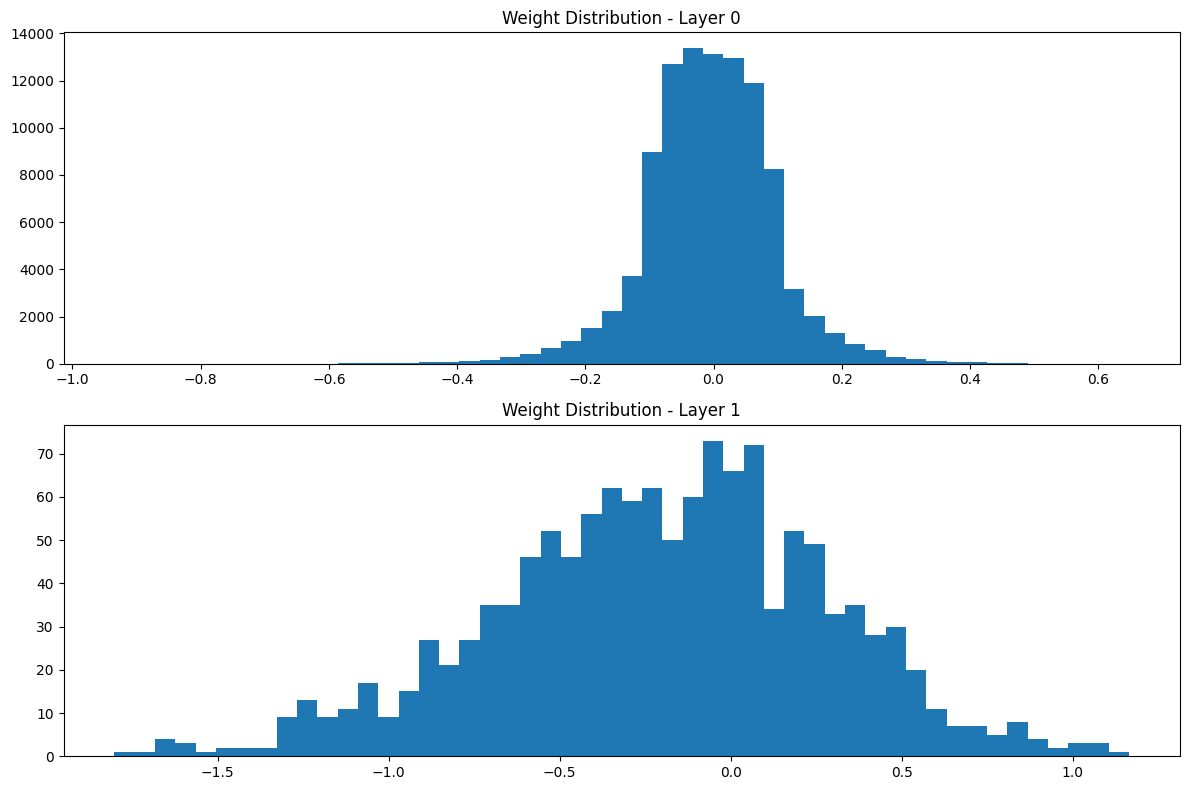

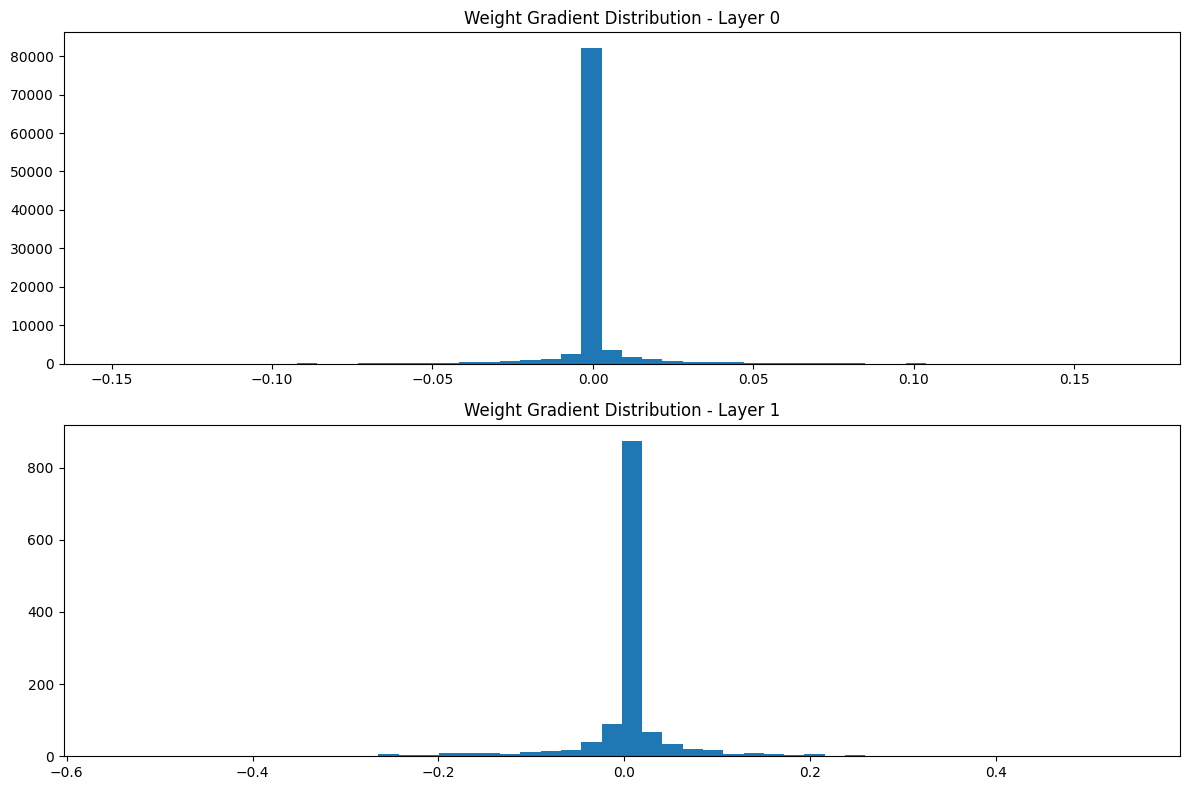


Depth Variation 2: [784, 128, 128, 10]
Epoch 1/10, Train Loss: 0.2826, Val Loss: 0.1566
Epoch 2/10, Train Loss: 0.1138, Val Loss: 0.1256
Epoch 3/10, Train Loss: 0.0795, Val Loss: 0.1232
Epoch 4/10, Train Loss: 0.0599, Val Loss: 0.1131
Epoch 5/10, Train Loss: 0.0499, Val Loss: 0.1288
Epoch 6/10, Train Loss: 0.0415, Val Loss: 0.1211
Epoch 7/10, Train Loss: 0.0340, Val Loss: 0.1181
Epoch 8/10, Train Loss: 0.0277, Val Loss: 0.1648
Epoch 9/10, Train Loss: 0.0267, Val Loss: 0.1411
Epoch 10/10, Train Loss: 0.0213, Val Loss: 0.1498
Accuracy: 0.974


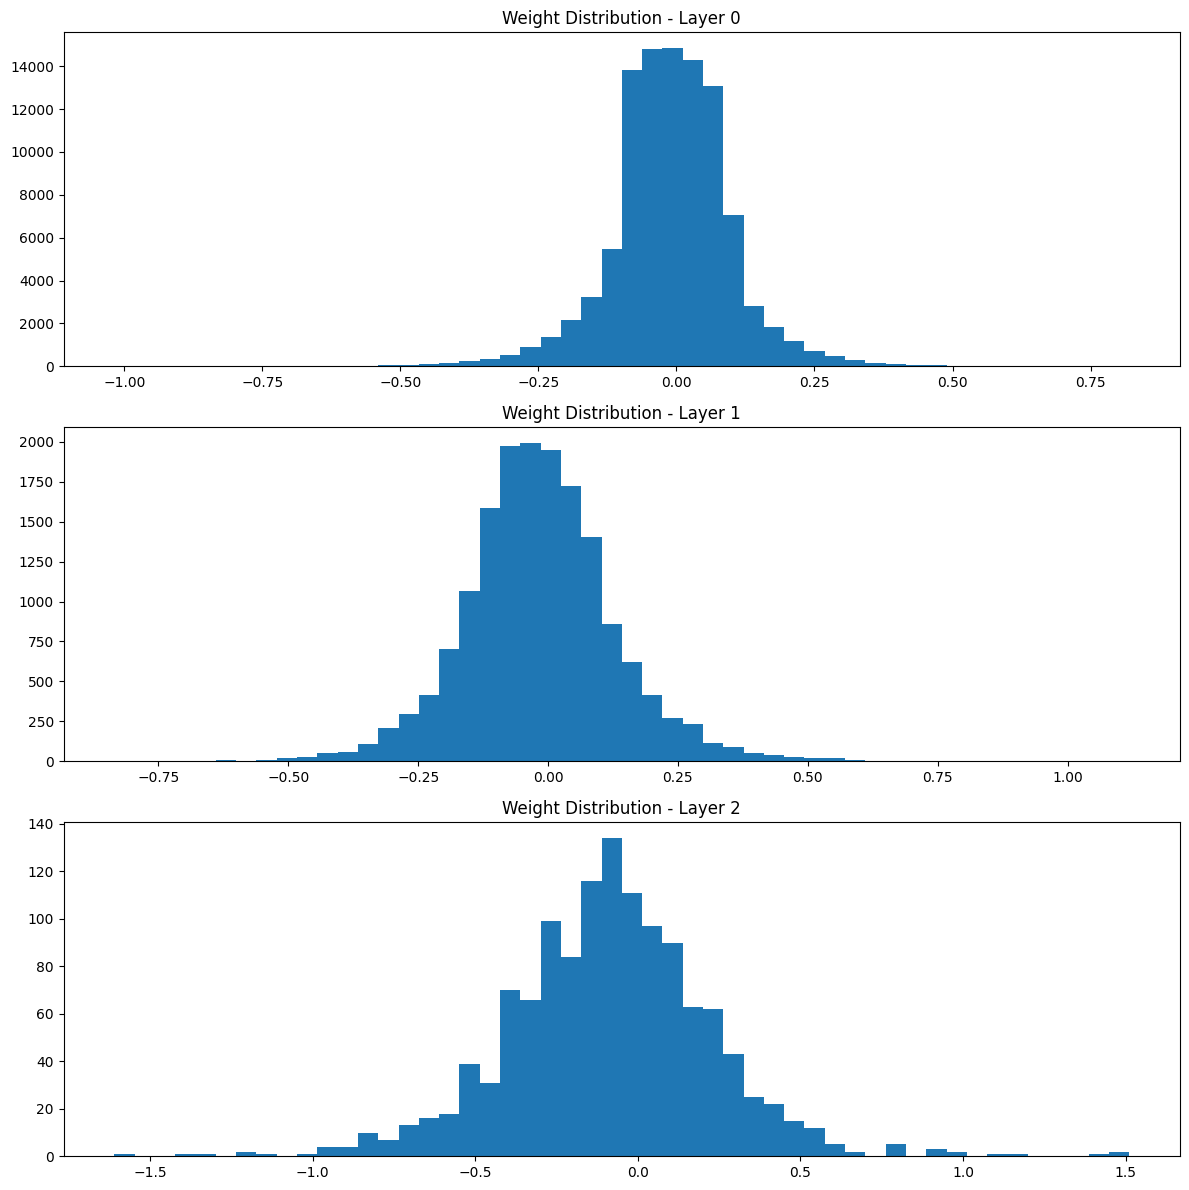

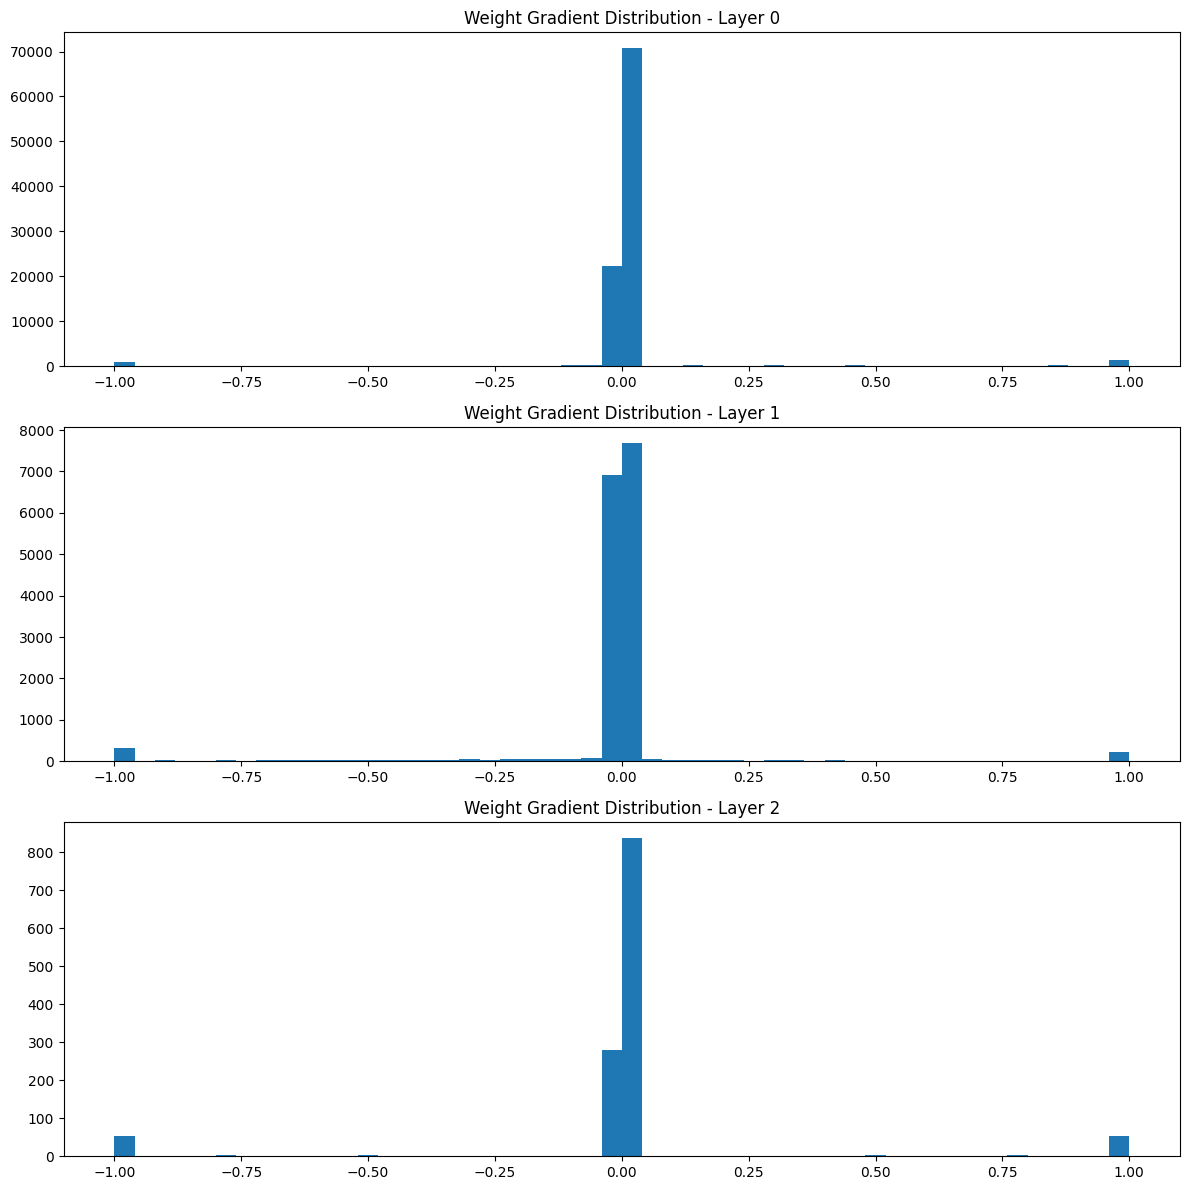


Depth Variation 3: [784, 128, 128, 128, 10]
Epoch 1/10, Train Loss: 0.3377, Val Loss: 0.1732
Epoch 2/10, Train Loss: 0.1437, Val Loss: 0.1550
Epoch 3/10, Train Loss: 0.1142, Val Loss: 0.1455
Epoch 4/10, Train Loss: 0.1025, Val Loss: 0.1660
Epoch 5/10, Train Loss: 0.0986, Val Loss: 0.1630
Epoch 6/10, Train Loss: 0.0819, Val Loss: 0.1790
Epoch 7/10, Train Loss: 0.0794, Val Loss: 0.2328
Epoch 8/10, Train Loss: 0.0735, Val Loss: 0.2063
Epoch 9/10, Train Loss: 0.0737, Val Loss: 0.2372
Epoch 10/10, Train Loss: 0.0718, Val Loss: 0.2023
Accuracy: 0.9732142857142857


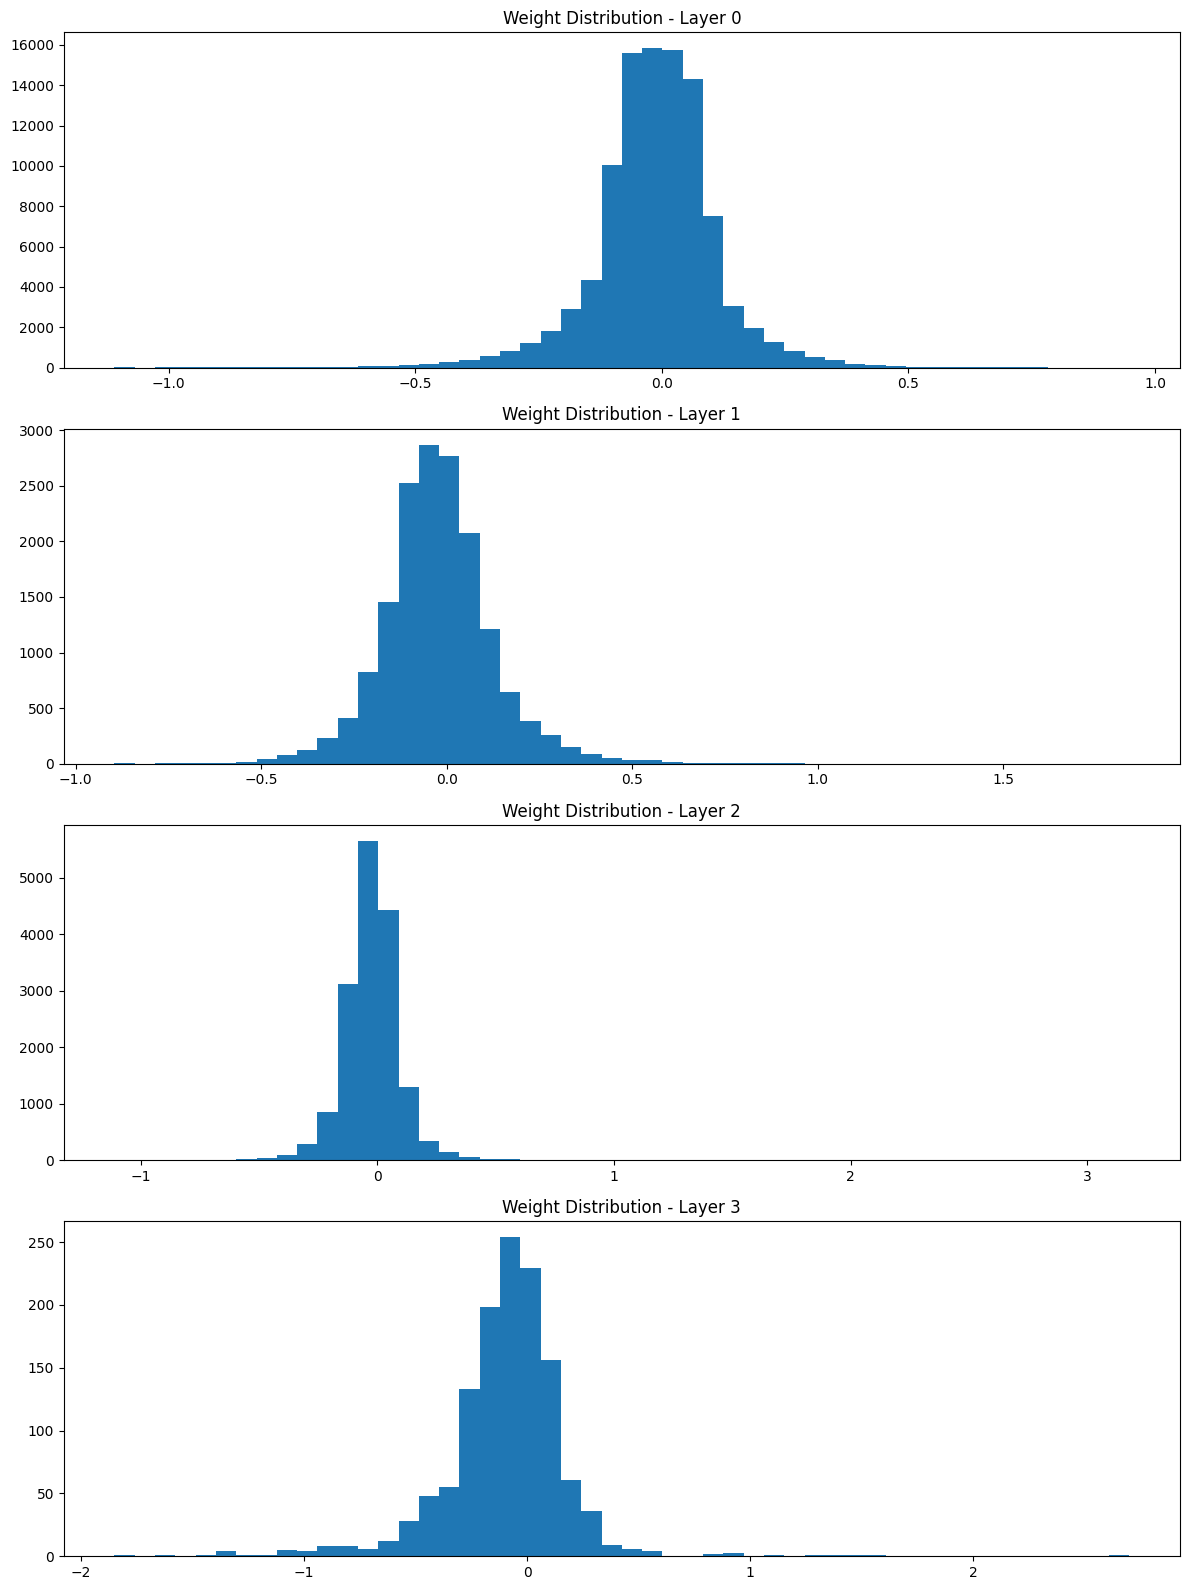

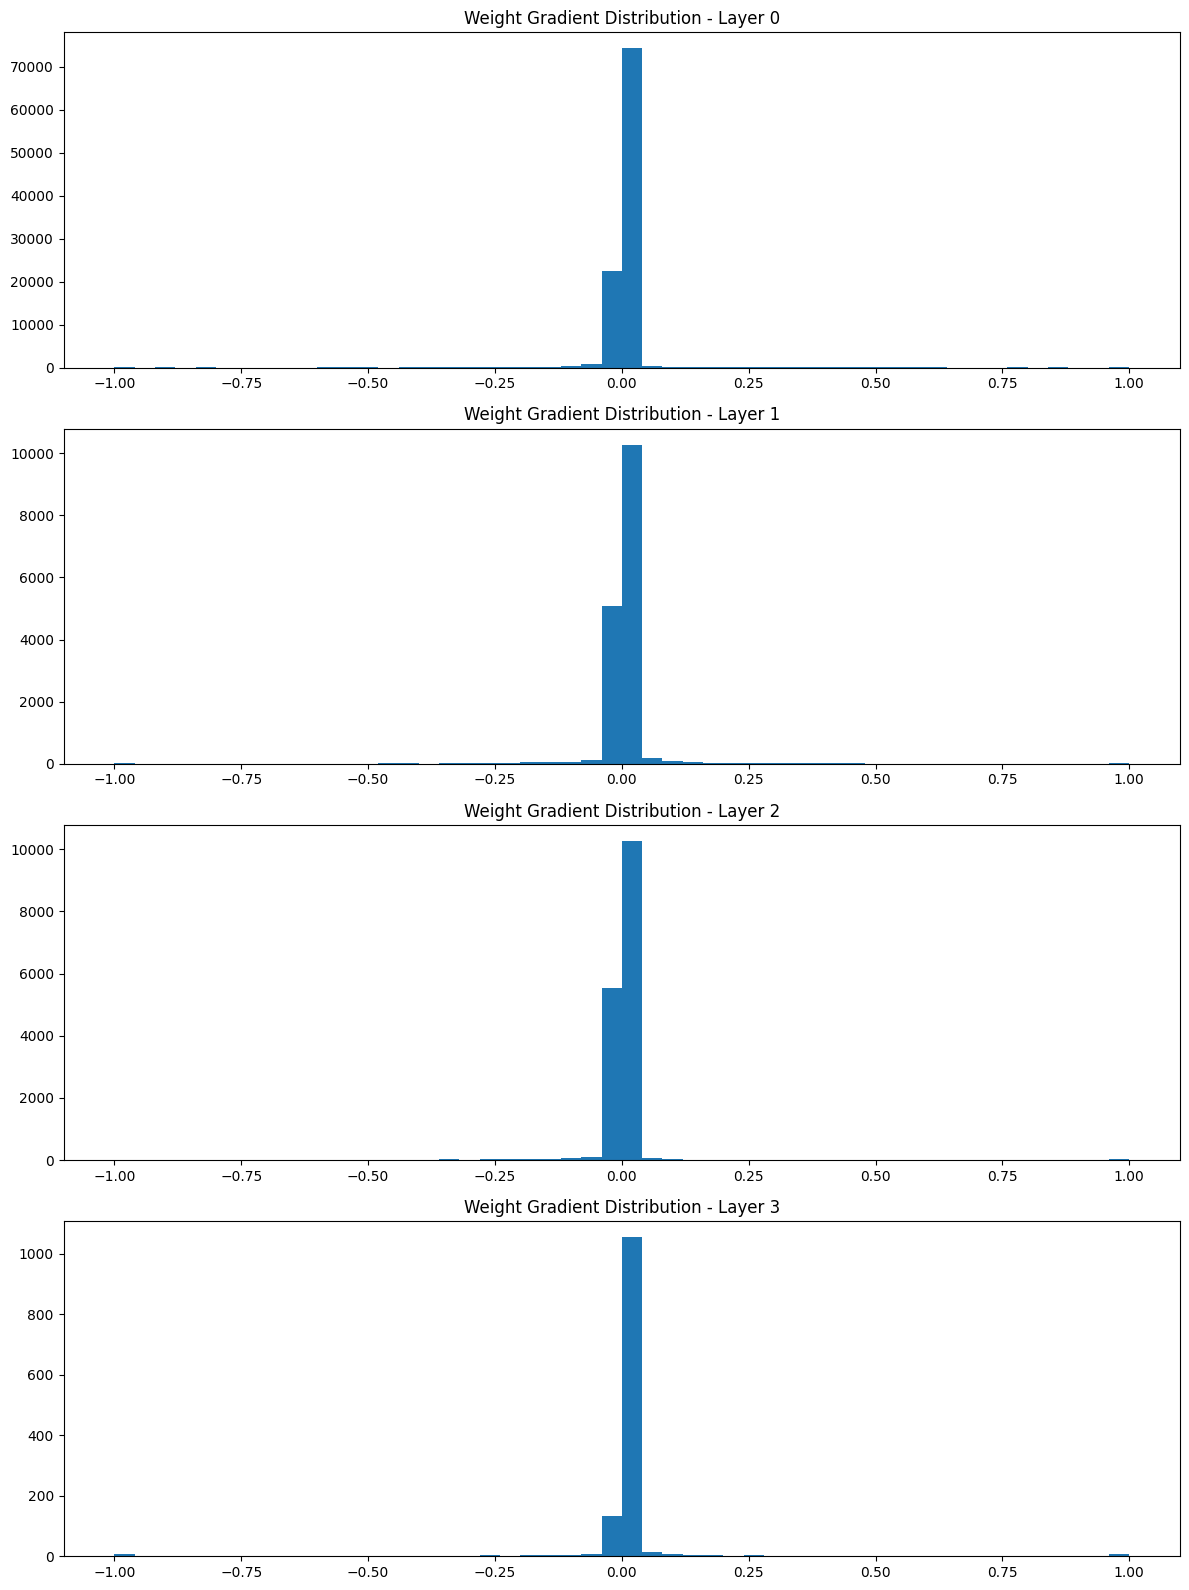

Analyzing Activation Functions

Activation Function: linear
Epoch 1/10, Train Loss: 0.4414, Val Loss: 0.4081
Epoch 2/10, Train Loss: 0.3760, Val Loss: 0.3969
Epoch 3/10, Train Loss: 0.3641, Val Loss: 0.3986
Epoch 4/10, Train Loss: 0.3567, Val Loss: 0.4019
Epoch 5/10, Train Loss: 0.3513, Val Loss: 0.4043
Epoch 6/10, Train Loss: 0.3489, Val Loss: 0.4097
Epoch 7/10, Train Loss: 0.3511, Val Loss: 0.4187
Epoch 8/10, Train Loss: 0.3566, Val Loss: 0.4285
Epoch 9/10, Train Loss: 0.3613, Val Loss: 0.4409
Epoch 10/10, Train Loss: 0.3660, Val Loss: 0.4484
Accuracy: 0.895


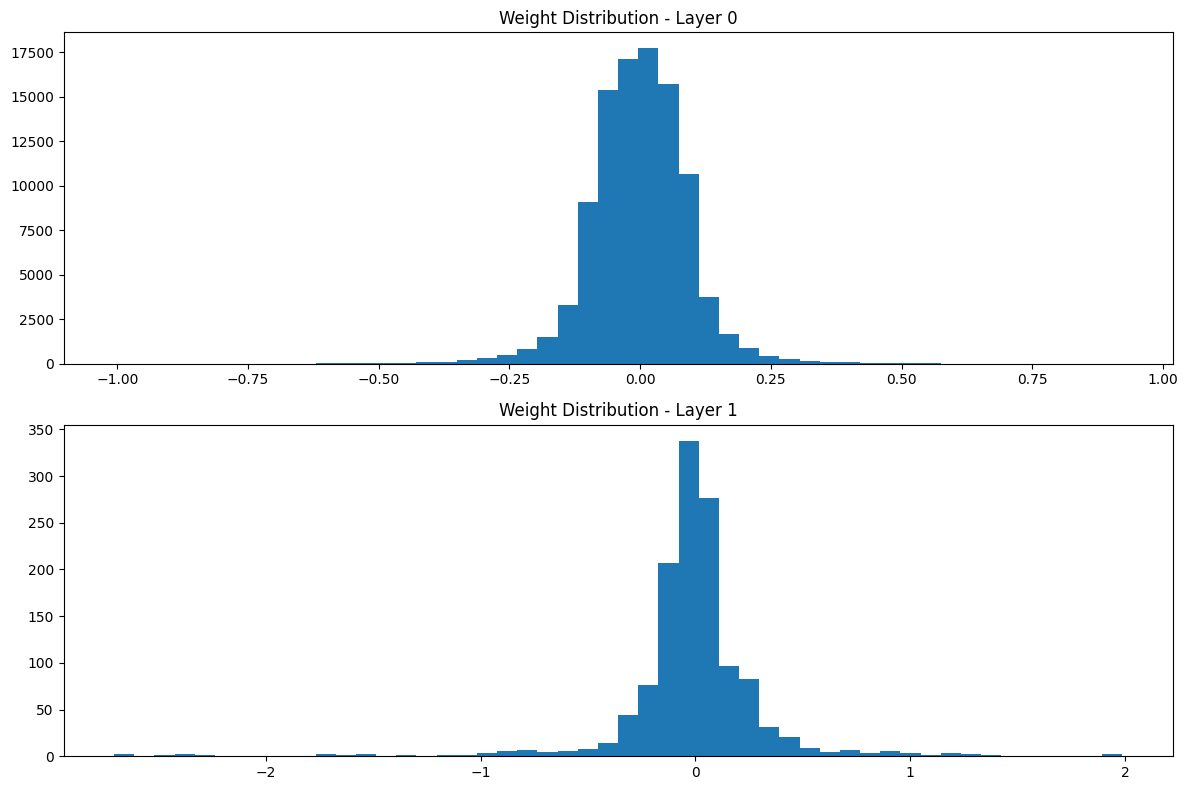

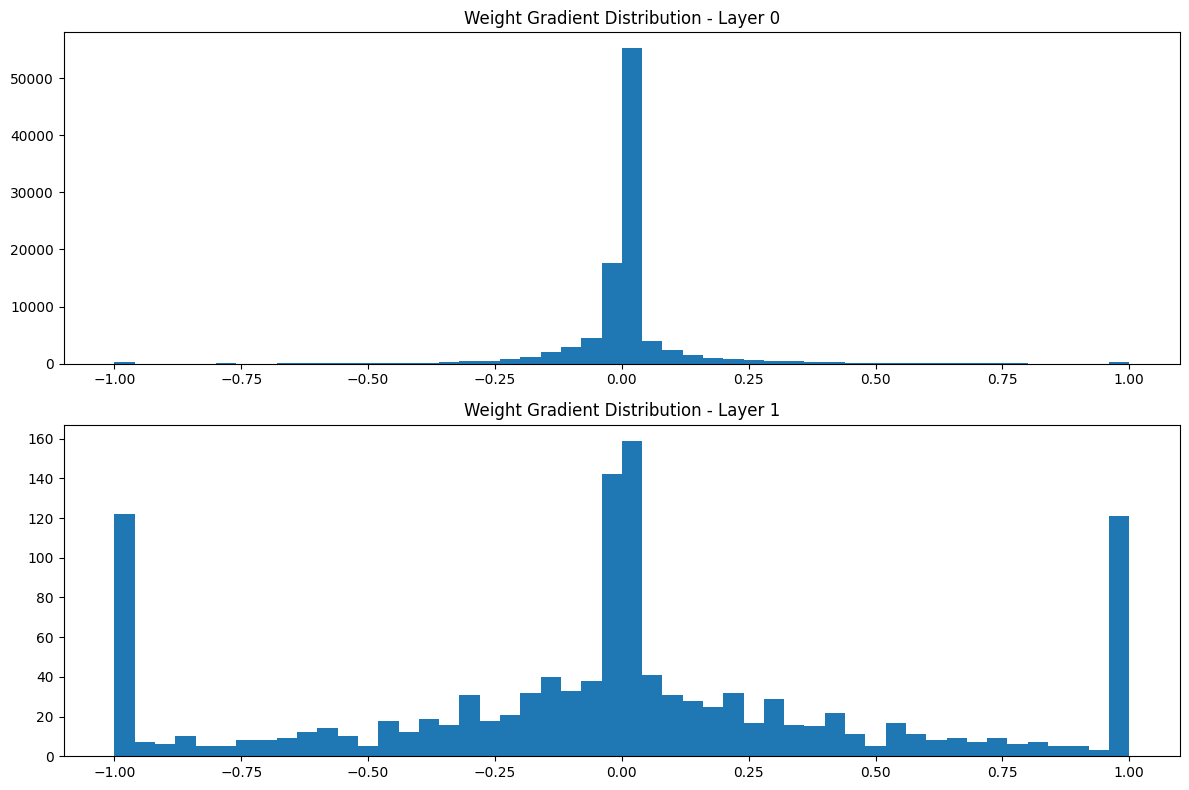


Activation Function: relu
Epoch 1/10, Train Loss: 0.2576, Val Loss: 0.1421
Epoch 2/10, Train Loss: 0.1093, Val Loss: 0.1158
Epoch 3/10, Train Loss: 0.0738, Val Loss: 0.1104
Epoch 4/10, Train Loss: 0.0538, Val Loss: 0.1090
Epoch 5/10, Train Loss: 0.0392, Val Loss: 0.1076
Epoch 6/10, Train Loss: 0.0303, Val Loss: 0.1008
Epoch 7/10, Train Loss: 0.0224, Val Loss: 0.1006
Epoch 8/10, Train Loss: 0.0168, Val Loss: 0.0958
Epoch 9/10, Train Loss: 0.0125, Val Loss: 0.0941
Epoch 10/10, Train Loss: 0.0094, Val Loss: 0.0940
Accuracy: 0.977


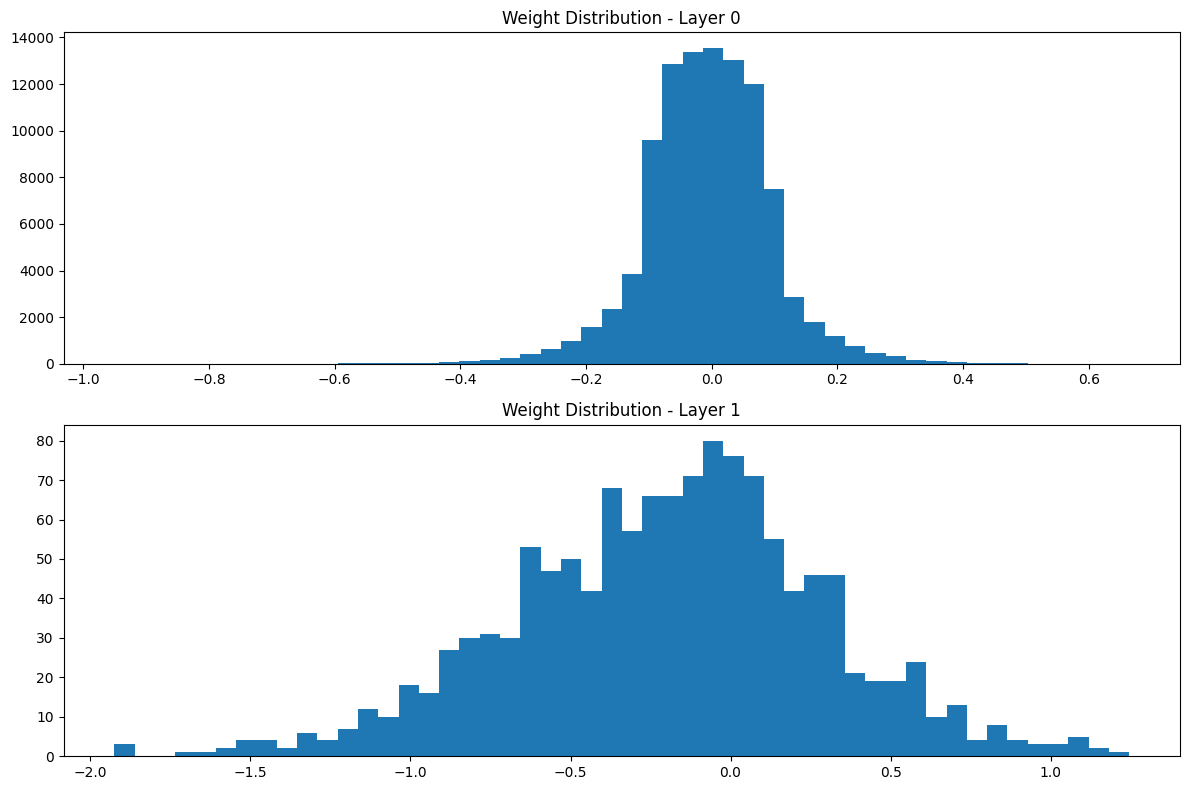

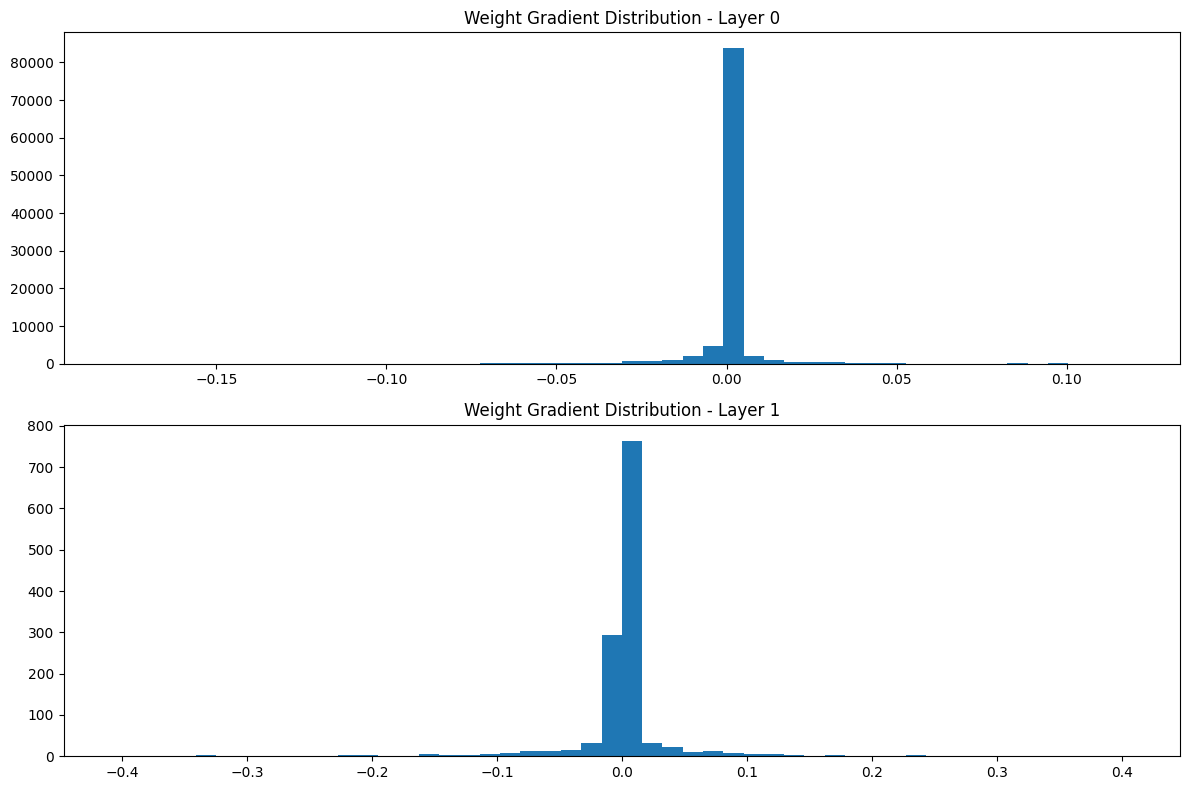


Activation Function: sigmoid
Epoch 1/10, Train Loss: 0.4673, Val Loss: 0.3267
Epoch 2/10, Train Loss: 0.3077, Val Loss: 0.3100
Epoch 3/10, Train Loss: 0.2932, Val Loss: 0.3002
Epoch 4/10, Train Loss: 0.2845, Val Loss: 0.2968
Epoch 5/10, Train Loss: 0.2809, Val Loss: 0.2960
Epoch 6/10, Train Loss: 0.2780, Val Loss: 0.2927
Epoch 7/10, Train Loss: 0.2748, Val Loss: 0.2887
Epoch 8/10, Train Loss: 0.2719, Val Loss: 0.2872
Epoch 9/10, Train Loss: 0.2708, Val Loss: 0.2861
Epoch 10/10, Train Loss: 0.2712, Val Loss: 0.2874
Accuracy: 0.9177142857142857


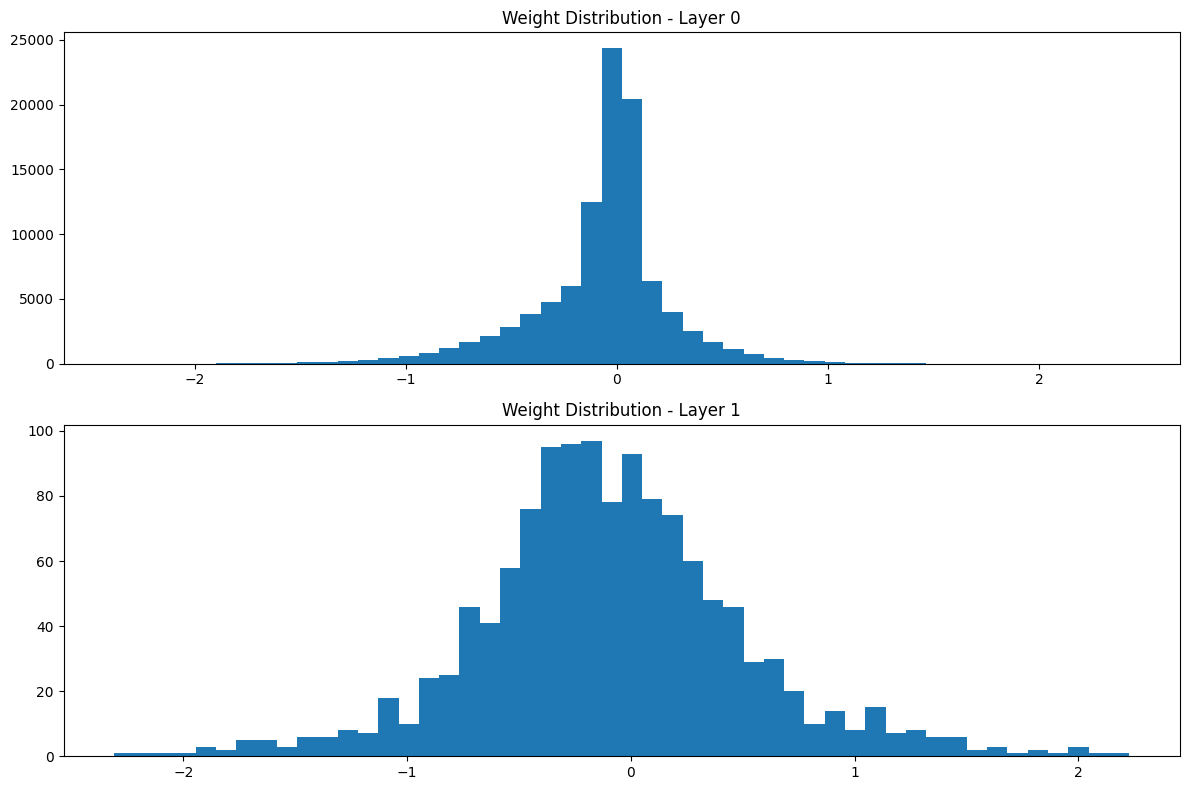

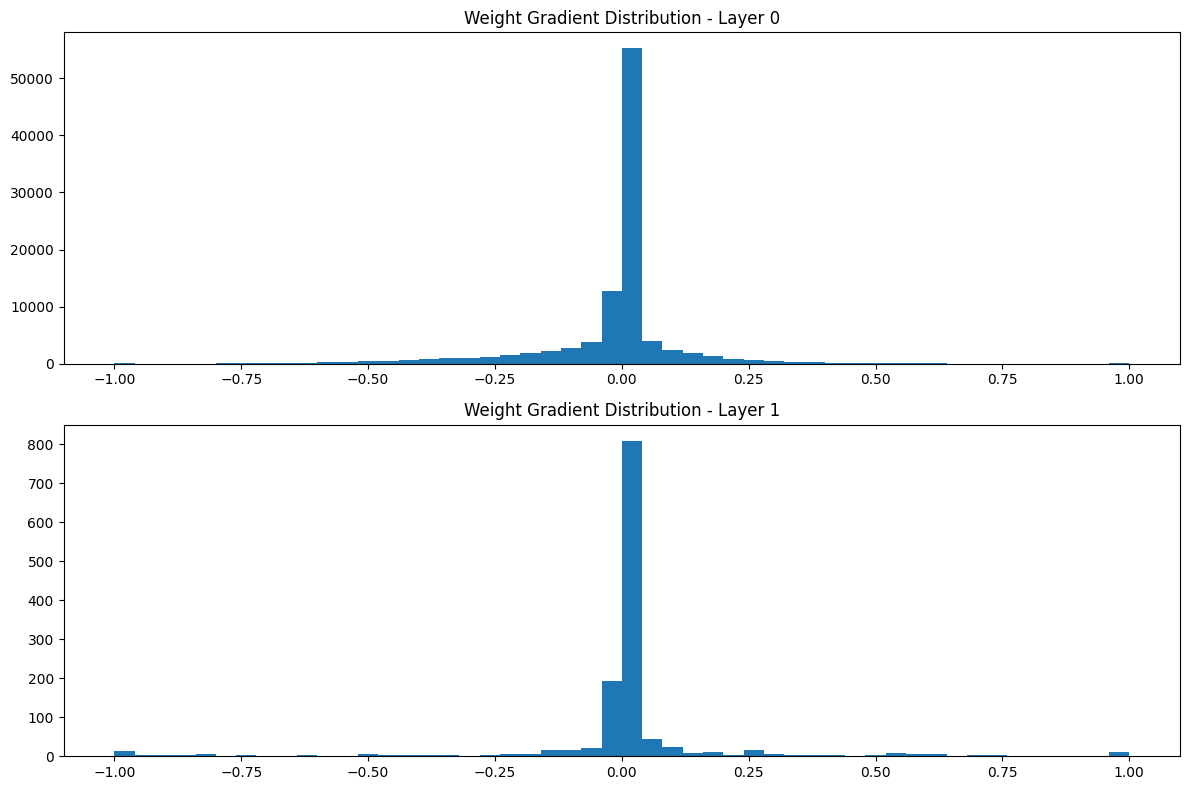


Activation Function: tanh
Epoch 1/10, Train Loss: 0.3283, Val Loss: 0.2377
Epoch 2/10, Train Loss: 0.1839, Val Loss: 0.1853
Epoch 3/10, Train Loss: 0.1374, Val Loss: 0.1592
Epoch 4/10, Train Loss: 0.1095, Val Loss: 0.1423
Epoch 5/10, Train Loss: 0.0897, Val Loss: 0.1368
Epoch 6/10, Train Loss: 0.0753, Val Loss: 0.1324
Epoch 7/10, Train Loss: 0.0635, Val Loss: 0.1278
Epoch 8/10, Train Loss: 0.0537, Val Loss: 0.1238
Epoch 9/10, Train Loss: 0.0457, Val Loss: 0.1226
Epoch 10/10, Train Loss: 0.0391, Val Loss: 0.1267
Accuracy: 0.9649285714285715


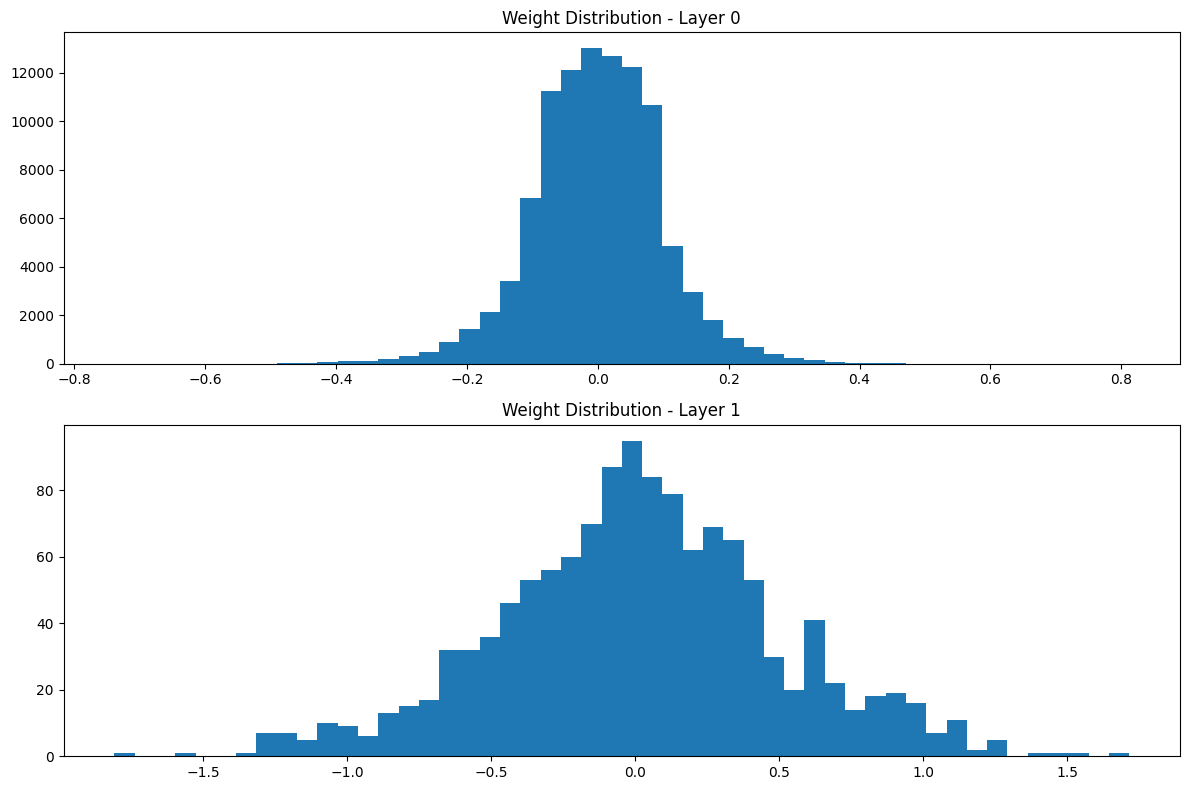

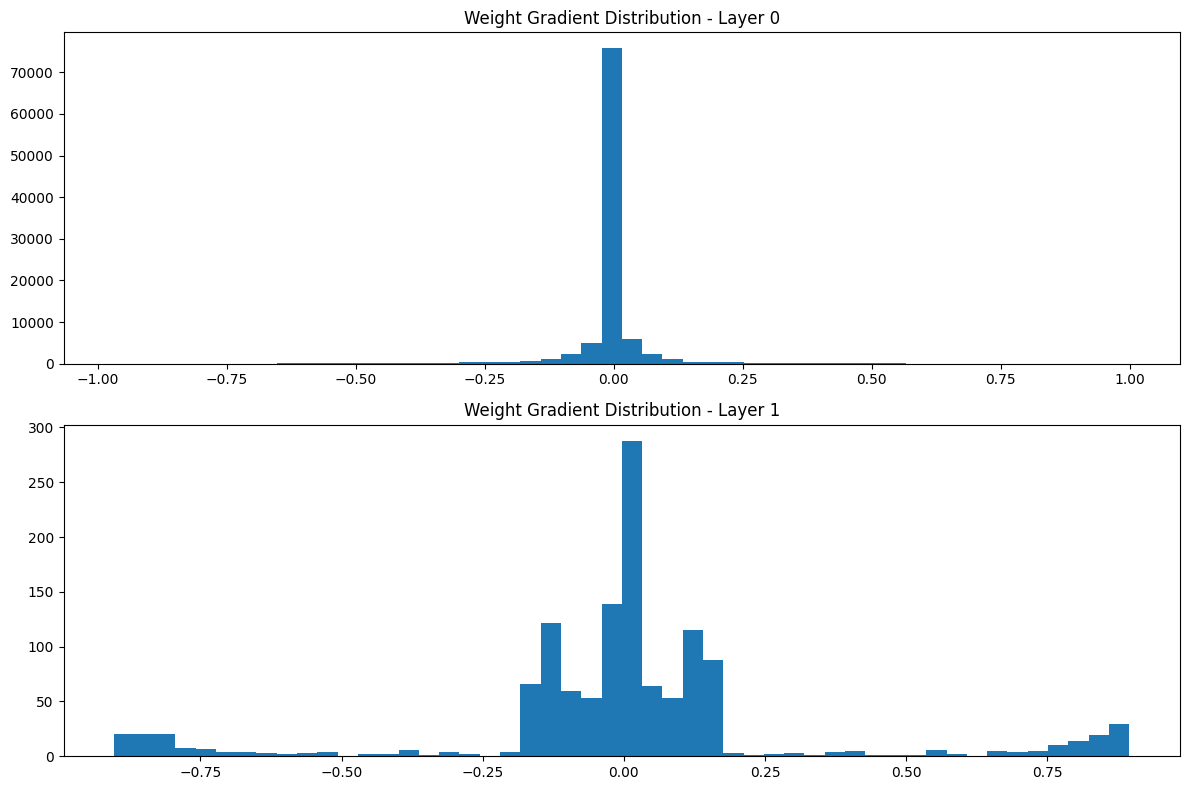

Analyzing Learning Rates

Learning Rate: 0.001
Epoch 1/10, Train Loss: 0.5593, Val Loss: 0.3217
Epoch 2/10, Train Loss: 0.2815, Val Loss: 0.2578
Epoch 3/10, Train Loss: 0.2279, Val Loss: 0.2194
Epoch 4/10, Train Loss: 0.1918, Val Loss: 0.1925
Epoch 5/10, Train Loss: 0.1656, Val Loss: 0.1728
Epoch 6/10, Train Loss: 0.1456, Val Loss: 0.1583
Epoch 7/10, Train Loss: 0.1301, Val Loss: 0.1471
Epoch 8/10, Train Loss: 0.1174, Val Loss: 0.1381
Epoch 9/10, Train Loss: 0.1070, Val Loss: 0.1309
Epoch 10/10, Train Loss: 0.0982, Val Loss: 0.1250
Accuracy: 0.9636428571428571


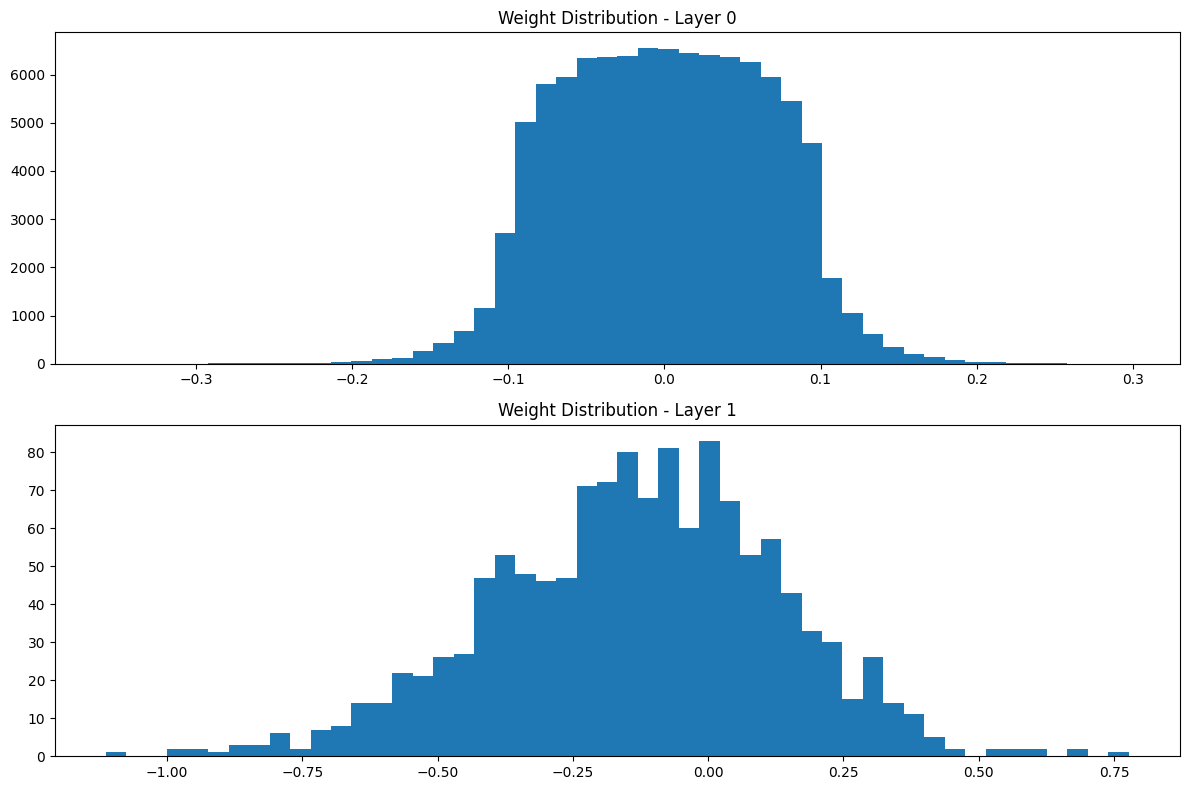

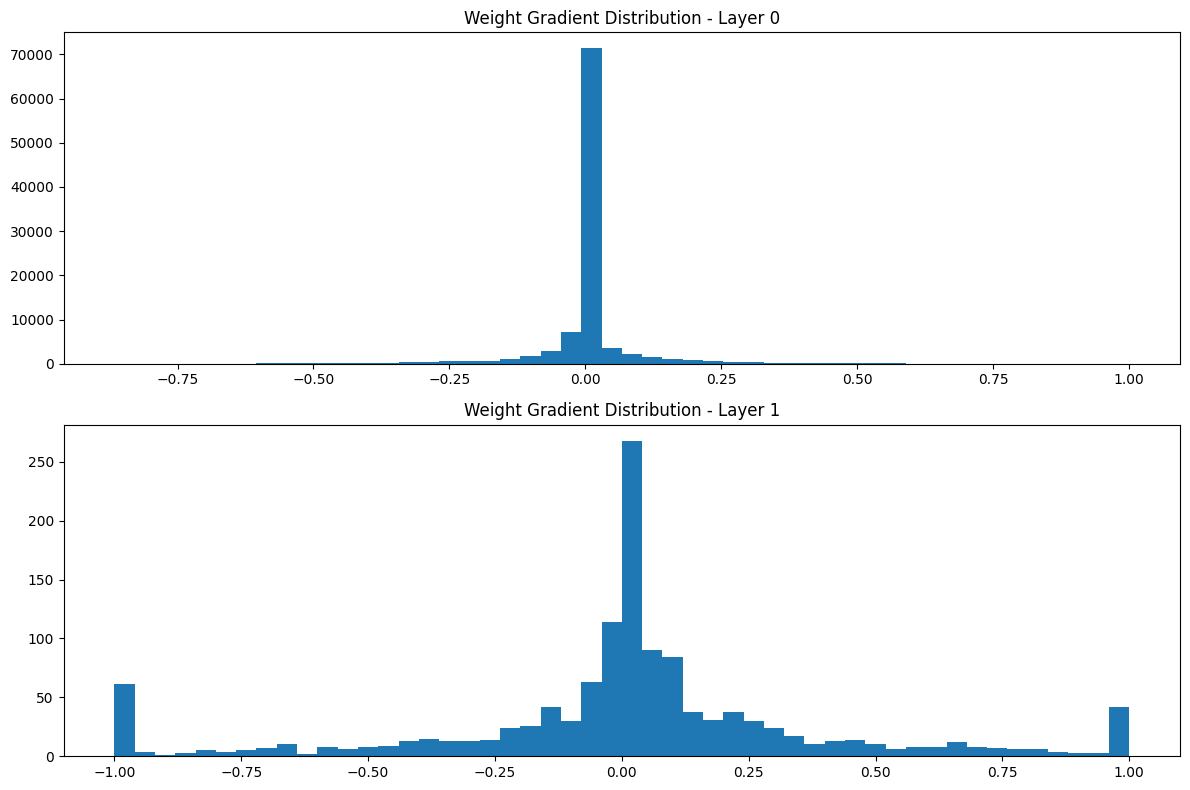


Learning Rate: 0.01
Epoch 1/10, Train Loss: 0.2575, Val Loss: 0.1421
Epoch 2/10, Train Loss: 0.1098, Val Loss: 0.1115
Epoch 3/10, Train Loss: 0.0755, Val Loss: 0.1032
Epoch 4/10, Train Loss: 0.0560, Val Loss: 0.1081
Epoch 5/10, Train Loss: 0.0419, Val Loss: 0.1078
Epoch 6/10, Train Loss: 0.0320, Val Loss: 0.1022
Epoch 7/10, Train Loss: 0.0233, Val Loss: 0.0980
Epoch 8/10, Train Loss: 0.0170, Val Loss: 0.1048
Epoch 9/10, Train Loss: 0.0131, Val Loss: 0.1019
Epoch 10/10, Train Loss: 0.0100, Val Loss: 0.1047
Accuracy: 0.9748571428571429


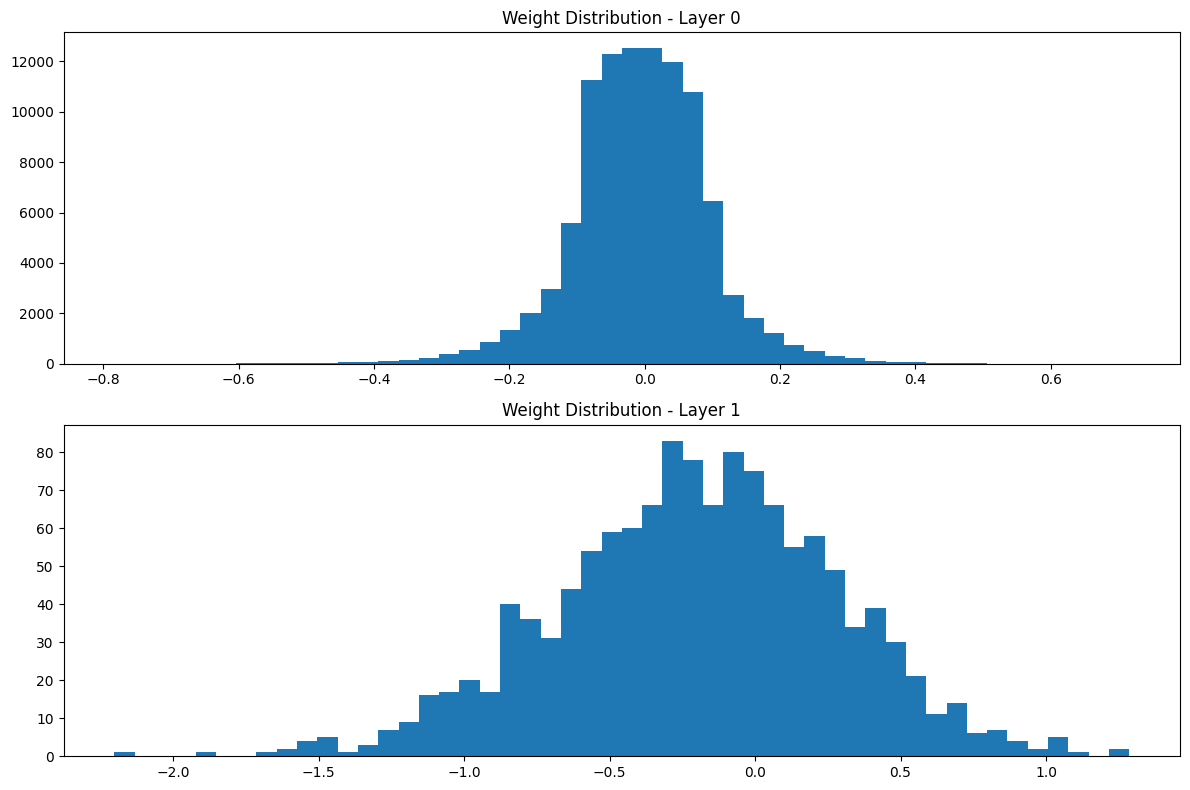

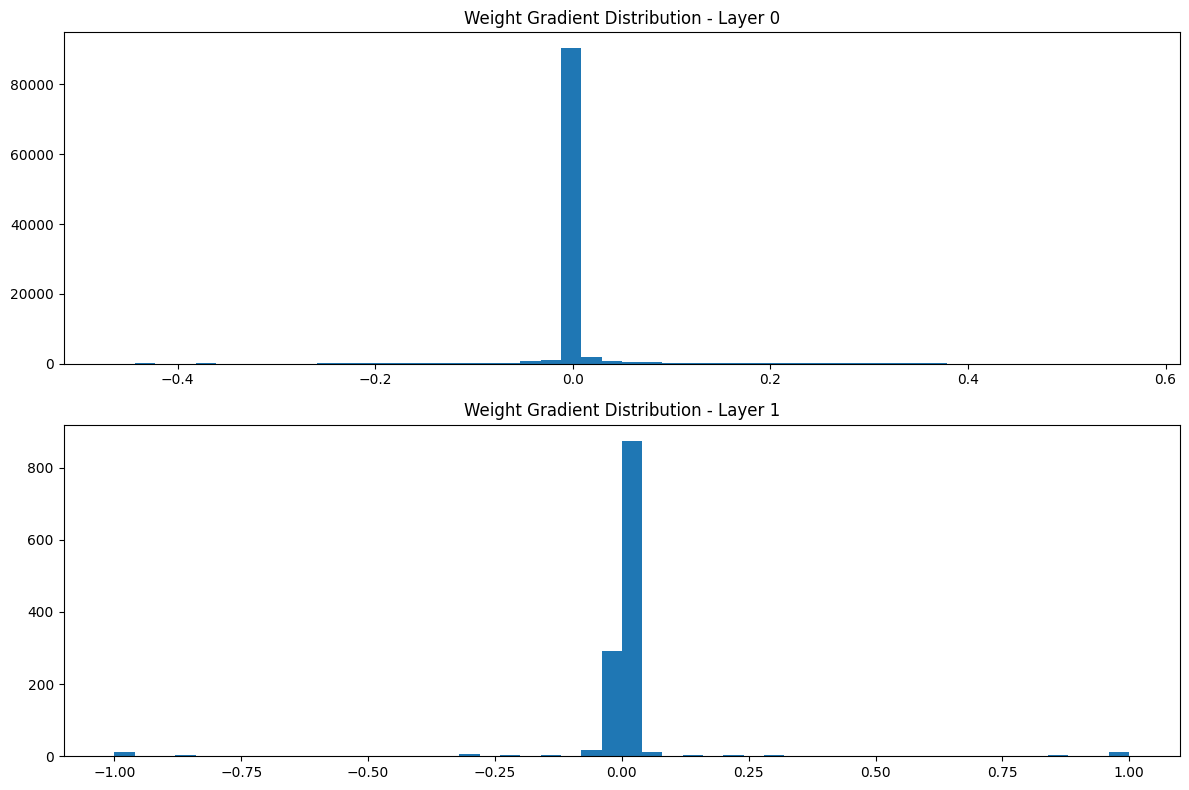


Learning Rate: 0.1
Epoch 1/10, Train Loss: 0.8093, Val Loss: 0.9408
Epoch 2/10, Train Loss: 0.5584, Val Loss: 0.7324
Epoch 3/10, Train Loss: 0.4559, Val Loss: 0.5712
Epoch 4/10, Train Loss: 0.4286, Val Loss: 0.5143
Epoch 5/10, Train Loss: 0.4150, Val Loss: 0.5064
Epoch 6/10, Train Loss: 0.3898, Val Loss: 0.6457
Epoch 7/10, Train Loss: 0.3640, Val Loss: 0.5245
Epoch 8/10, Train Loss: 0.3614, Val Loss: 0.4725
Epoch 9/10, Train Loss: 0.3356, Val Loss: 0.4402
Epoch 10/10, Train Loss: 0.3227, Val Loss: 0.4904
Accuracy: 0.9236428571428571


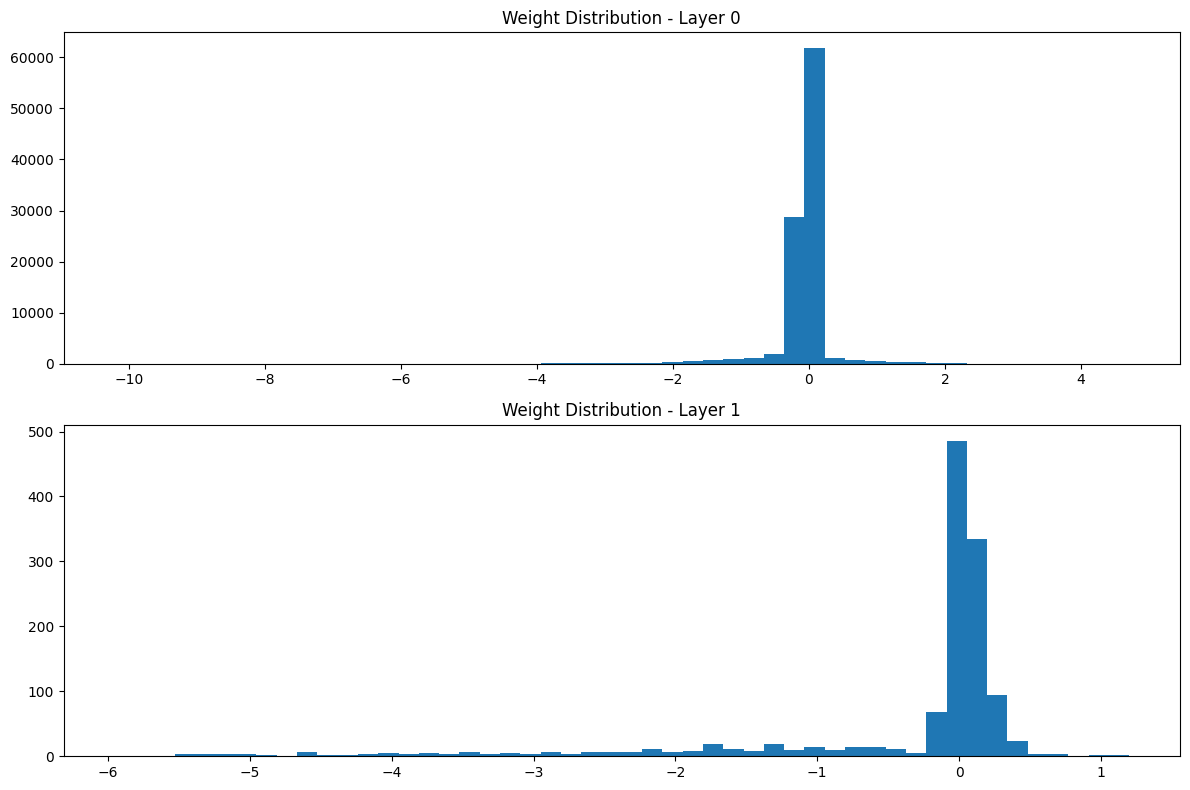

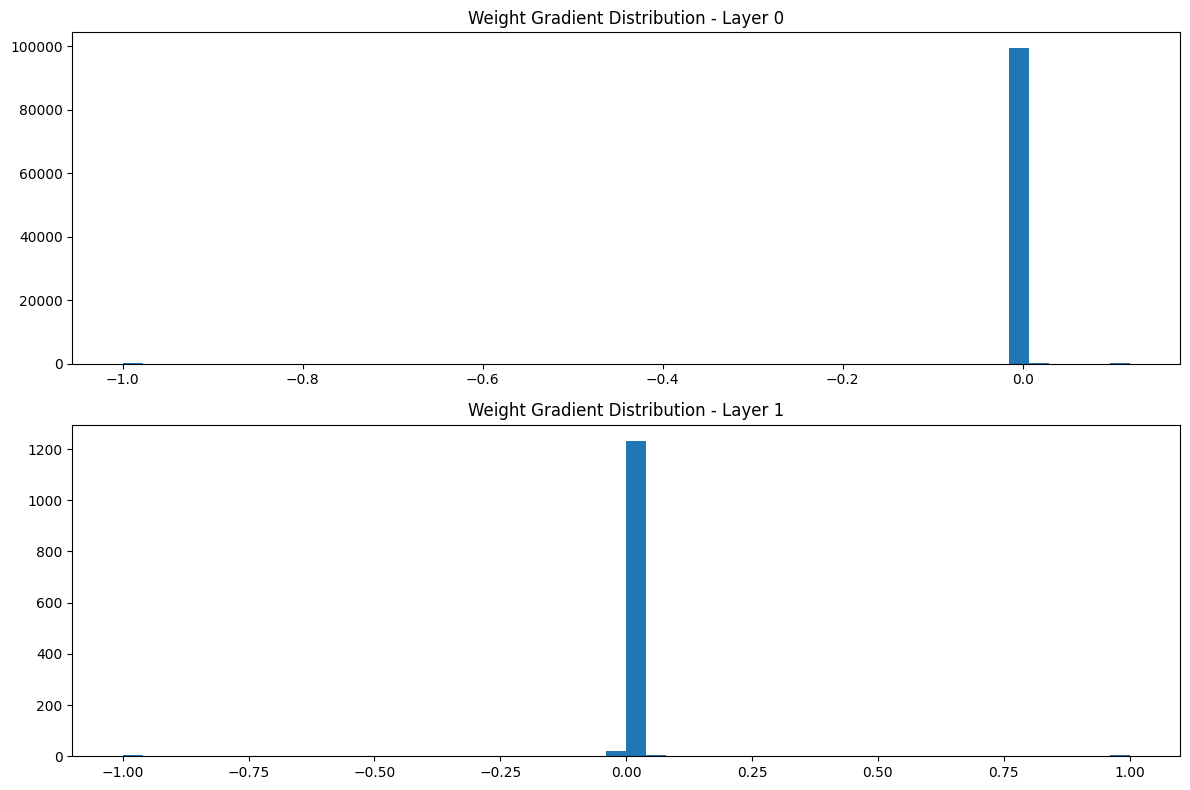

Analyzing Weight Initialization

Initialization Method: zero
Epoch 1/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 2/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 3/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 4/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 5/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 6/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 7/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 8/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 9/10, Train Loss: 2.3022, Val Loss: 2.3012
Epoch 10/10, Train Loss: 2.3022, Val Loss: 2.3012
Accuracy: 0.11428571428571428


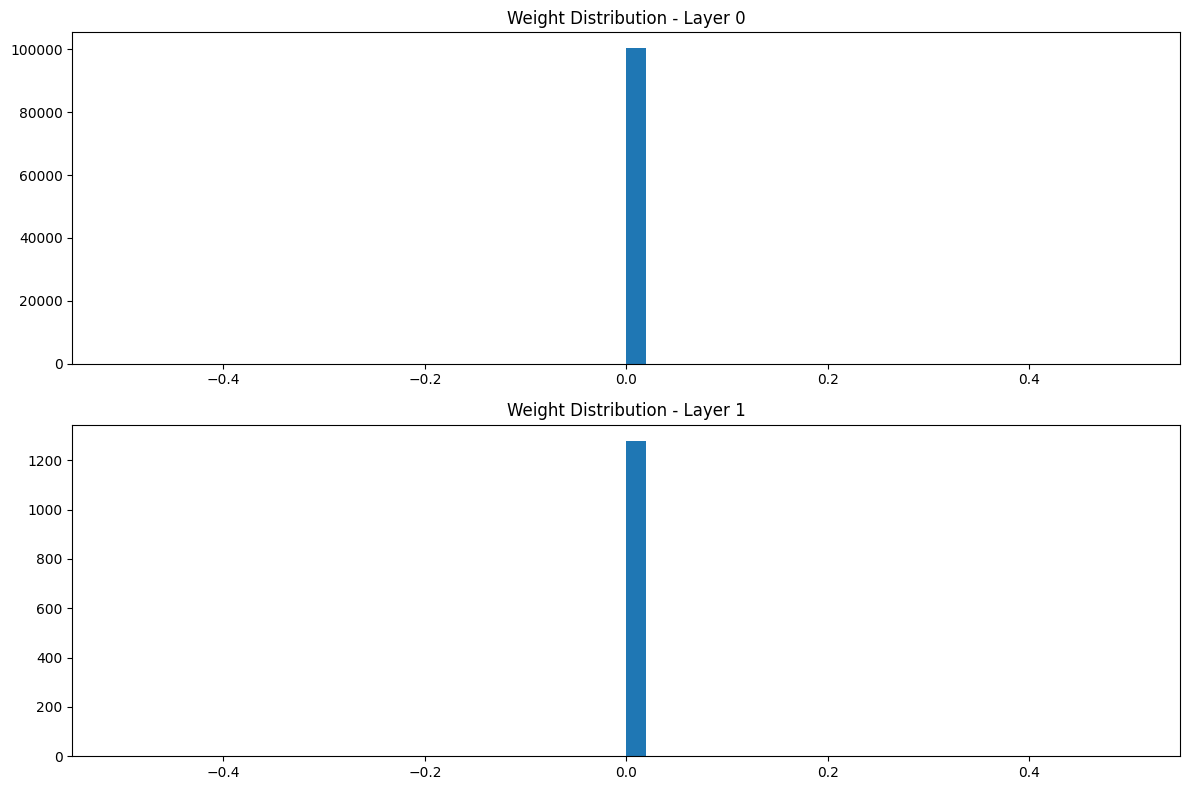

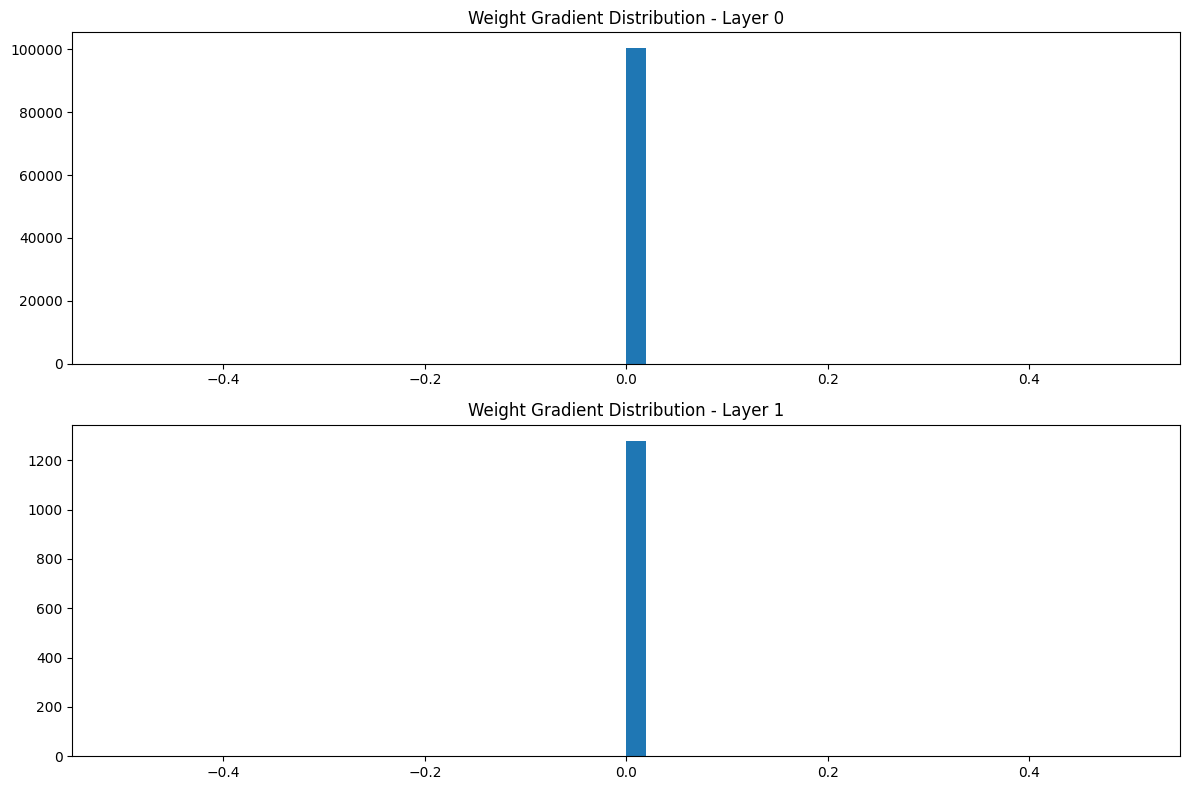


Initialization Method: uniform
Epoch 1/10, Train Loss: 0.2541, Val Loss: 0.1411
Epoch 2/10, Train Loss: 0.1084, Val Loss: 0.1133
Epoch 3/10, Train Loss: 0.0727, Val Loss: 0.1042
Epoch 4/10, Train Loss: 0.0531, Val Loss: 0.1000
Epoch 5/10, Train Loss: 0.0397, Val Loss: 0.0987
Epoch 6/10, Train Loss: 0.0300, Val Loss: 0.0930
Epoch 7/10, Train Loss: 0.0219, Val Loss: 0.0923
Epoch 8/10, Train Loss: 0.0166, Val Loss: 0.1007
Epoch 9/10, Train Loss: 0.0126, Val Loss: 0.1017
Epoch 10/10, Train Loss: 0.0094, Val Loss: 0.0961
Accuracy: 0.9743571428571428


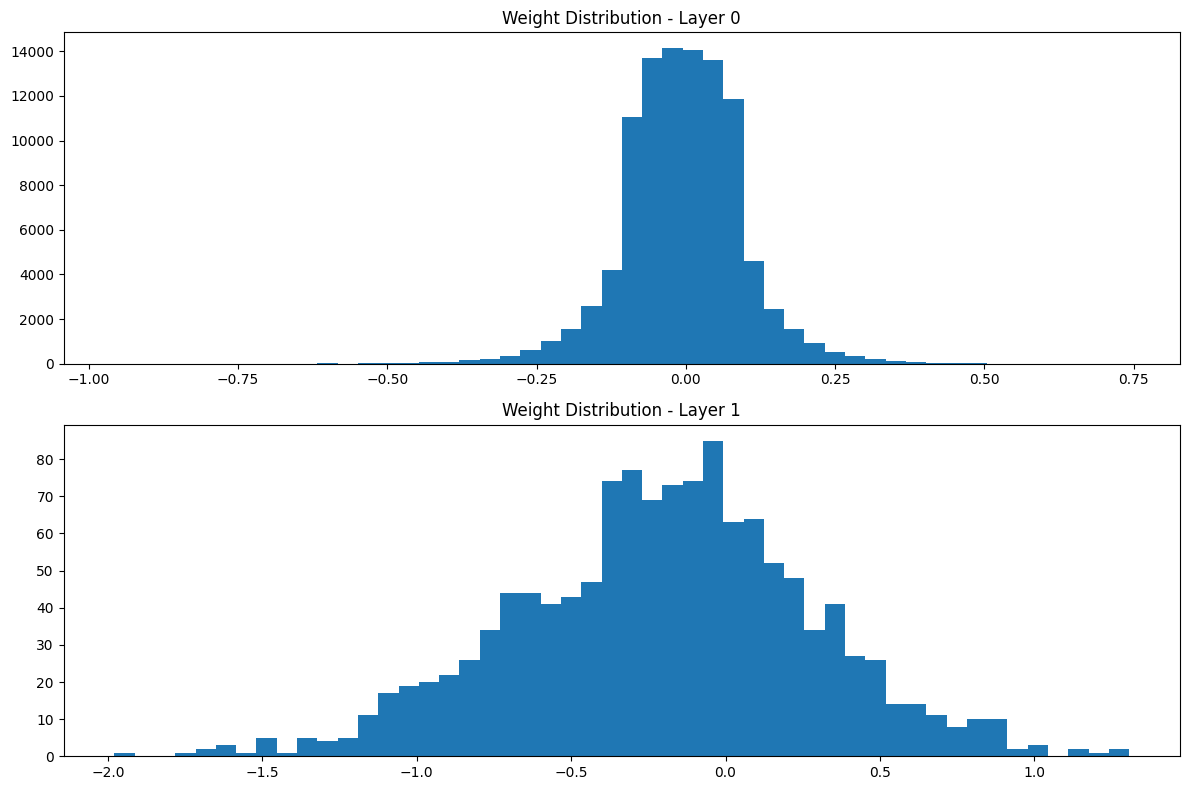

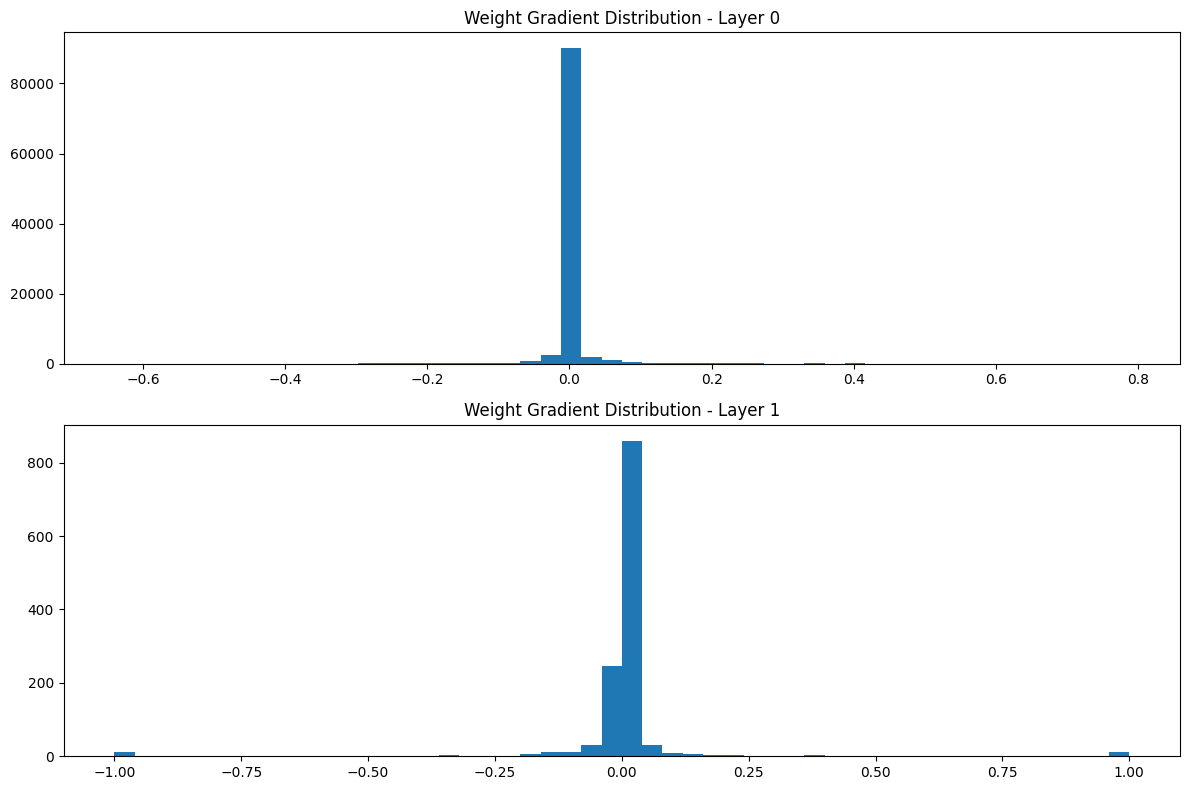


Initialization Method: normal
Epoch 1/10, Train Loss: 0.2903, Val Loss: 0.1448
Epoch 2/10, Train Loss: 0.1111, Val Loss: 0.1114
Epoch 3/10, Train Loss: 0.0761, Val Loss: 0.1056
Epoch 4/10, Train Loss: 0.0562, Val Loss: 0.1072
Epoch 5/10, Train Loss: 0.0421, Val Loss: 0.1086
Epoch 6/10, Train Loss: 0.0309, Val Loss: 0.1193
Epoch 7/10, Train Loss: 0.0234, Val Loss: 0.1088
Epoch 8/10, Train Loss: 0.0184, Val Loss: 0.1113
Epoch 9/10, Train Loss: 0.0137, Val Loss: 0.1046
Epoch 10/10, Train Loss: 0.0106, Val Loss: 0.1074
Accuracy: 0.9727142857142858


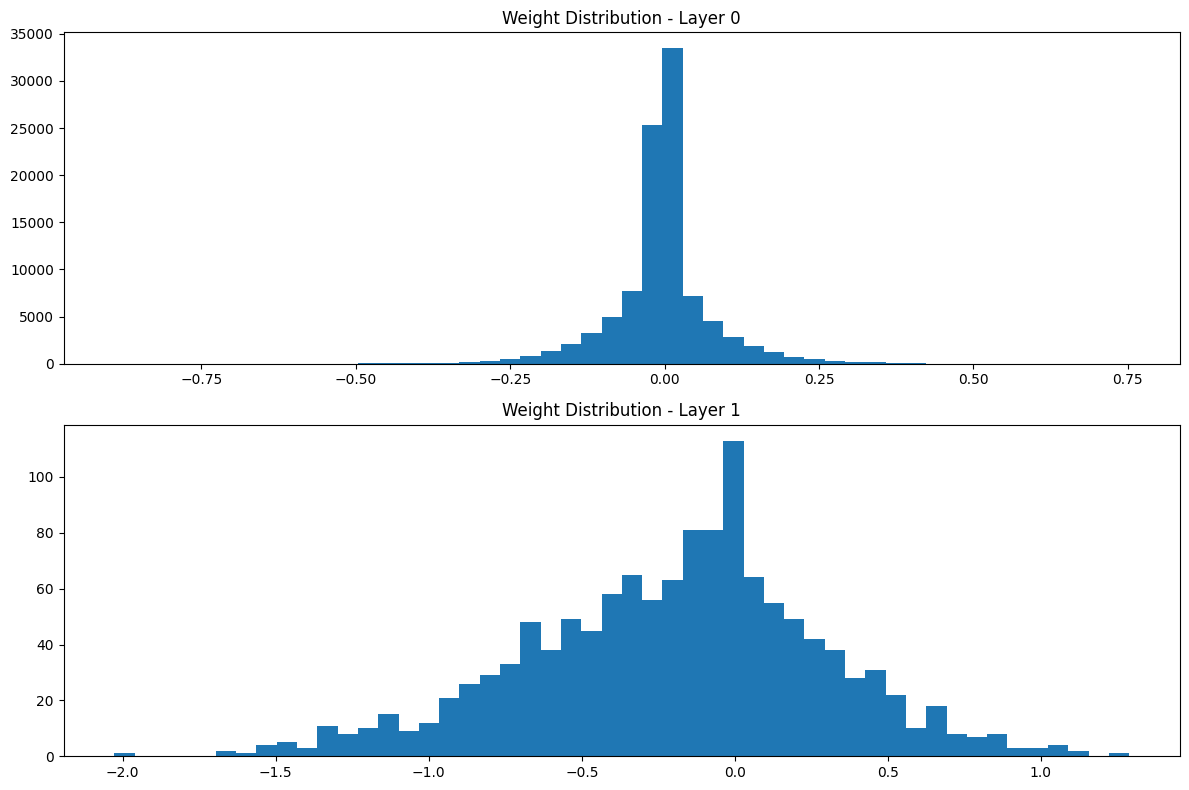

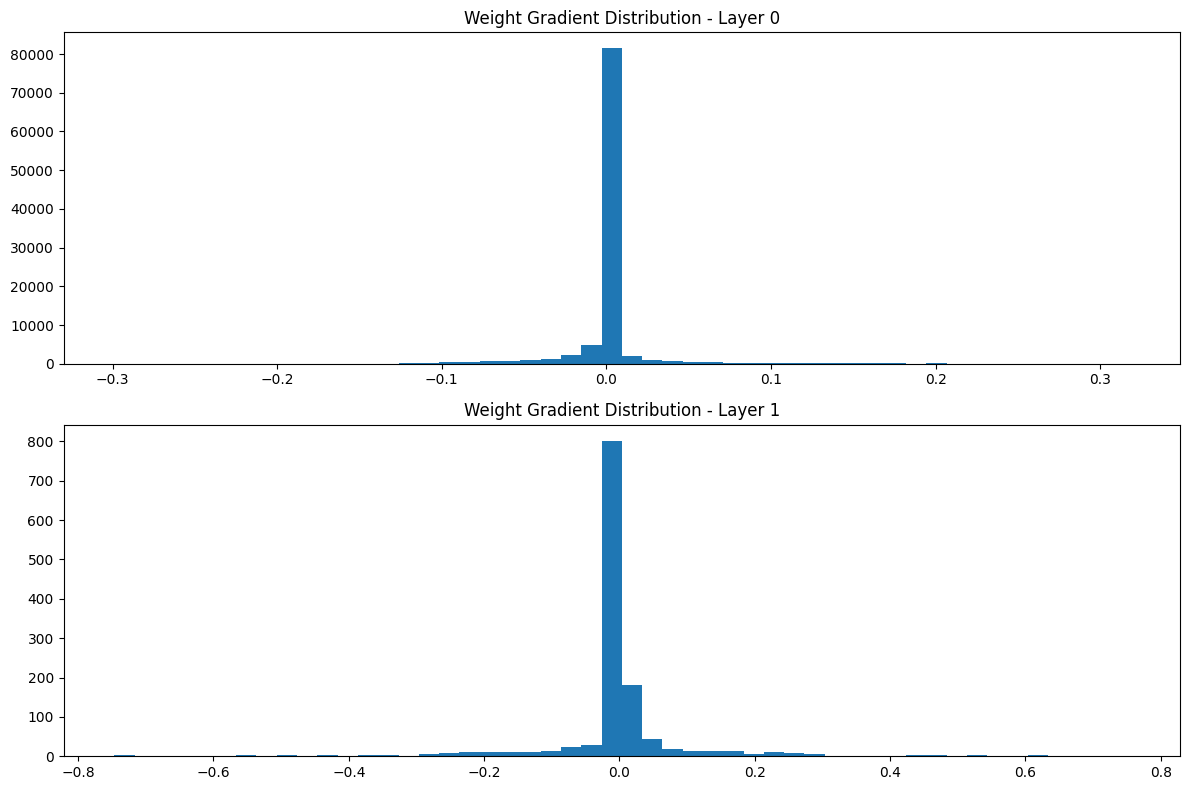

Comparing with Sklearn MLP
Epoch 1/10, Train Loss: 0.2558, Val Loss: 0.1459
Epoch 2/10, Train Loss: 0.1083, Val Loss: 0.1101
Epoch 3/10, Train Loss: 0.0739, Val Loss: 0.1097
Epoch 4/10, Train Loss: 0.0536, Val Loss: 0.1067
Epoch 5/10, Train Loss: 0.0394, Val Loss: 0.1113
Epoch 6/10, Train Loss: 0.0296, Val Loss: 0.1118
Epoch 7/10, Train Loss: 0.0223, Val Loss: 0.1082
Epoch 8/10, Train Loss: 0.0169, Val Loss: 0.1041
Epoch 9/10, Train Loss: 0.0127, Val Loss: 0.1064
Epoch 10/10, Train Loss: 0.0094, Val Loss: 0.1063
Custom FFNN Accuracy: 0.9747857142857143
Sklearn MLP Accuracy: 0.9692142857142857


/Users/ekaaprawira/Documents/github/SEMVII/ML/Tubes1_ML/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from ffnn import FFNN 

def load_mnist_dataset():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target
    X = X.astype('float32') / 255.0  
    y = y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_onehot = np.eye(10)[y_train]
    y_test_onehot = np.eye(10)[y_test]
    return X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot

def analyze_depth_and_width(X_train, X_test, y_train_onehot, y_test_onehot):
    print("Analyzing Depth and Width")
    width_variations = [[784, 128, 10], [784, 256, 10], [784, 512, 10]]
    depth_variations = [[784, 128, 10], [784, 128, 128, 10], [784, 128, 128, 128, 10]]
    
    for i, layer_sizes in enumerate(width_variations, 1):
        print(f"\nWidth Variation {i}: {layer_sizes}")
        model = FFNN(layer_sizes=layer_sizes, activation_func=['relu']*(len(layer_sizes)-2) + ['softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

    for i, layer_sizes in enumerate(depth_variations, 1):
        print(f"\nDepth Variation {i}: {layer_sizes}")
        model = FFNN(layer_sizes=layer_sizes, activation_func=['relu']*(len(layer_sizes)-2) + ['softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_activation_functions(X_train, X_test, y_train_onehot, y_test_onehot):
    print("Analyzing Activation Functions")
    activations = ['linear', 'relu', 'sigmoid', 'tanh']
    for activation in activations:
        print(f"\nActivation Function: {activation}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=[activation, 'softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_learning_rates(X_train, X_test, y_train_onehot, y_test_onehot):
    print("Analyzing Learning Rates")
    learning_rates = [0.001, 0.01, 0.1]
    for lr in learning_rates:
        print(f"\nLearning Rate: {lr}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=lr)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_weight_initialization(X_train, X_test, y_train_onehot, y_test_onehot):
    print("Analyzing Weight Initialization")
    init_methods = ['zero', 'uniform', 'normal']
    for method in init_methods:
        print(f"\nInitialization Method: {method}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', weight_init=method, learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def compare_with_sklearn(X_train, X_test, y_train, y_test):
    print("Comparing with Sklearn MLP")
    model_ffnn = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=0.01)
    model_ffnn.train(X_train, np.eye(10)[y_train], X_test, np.eye(10)[y_test], epochs=10, batch_size=64, verbose=1)
    y_pred_ffnn = model_ffnn.predict(X_test)
    accuracy_ffnn = accuracy_score(y_test, np.argmax(y_pred_ffnn, axis=1))
    print(f"Custom FFNN Accuracy: {accuracy_ffnn}")

    model_sklearn = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=10)
    model_sklearn.fit(X_train, y_train)
    y_pred_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Sklearn MLP Accuracy: {accuracy_sklearn}")

def main():
    X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_dataset()
    analyze_depth_and_width(X_train, X_test, y_train_onehot, y_test_onehot)
    analyze_activation_functions(X_train, X_test, y_train_onehot, y_test_onehot)
    analyze_learning_rates(X_train, X_test, y_train_onehot, y_test_onehot)
    analyze_weight_initialization(X_train, X_test, y_train_onehot, y_test_onehot)
    compare_with_sklearn(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()